In [1]:
# Import packages

# Regression Models
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import (AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor,
RandomForestRegressor, VotingRegressor, HistGradientBoostingRegressor, ExtraTreesRegressor, StackingRegressor)

# Preprocessing
from sklearn.feature_selection import SelectKBest, f_regression, RFE, RFECV
from sklearn.preprocessing import LabelEncoder, StandardScaler ,OneHotEncoder, MinMaxScaler, PolynomialFeatures

# model_selection
from sklearn.model_selection import (train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold, 
learning_curve, cross_val_predict, cross_validate, permutation_test_score, validation_curve, RandomizedSearchCV)

# Metrics
from sklearn.metrics import (accuracy_score, cohen_kappa_score, confusion_matrix, mean_squared_error, r2_score,
root_mean_squared_error, recall_score, roc_auc_score, roc_curve, mean_absolute_error, auc, classification_report)

# Display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [4]:
# Packages 

# Core Time Series Libraries
# pandas - Essential for time series data manipulation
import pandas as pd

# numpy - Fundamental array operations
import numpy as np

# Specialized Time Series Analysis
# statsmodels - Statistical time series models (ARIMA, SARIMA, VAR, etc.)
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

# scikit-learn - Machine learning approaches for time series
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Advanced Forecasting Libraries
# prophet - Facebook's forecasting tool for business time series
from prophet import Prophet

# pmdarima - Auto-ARIMA and statistical forecasting
import pmdarima as pm
from pmdarima import auto_arima

# sktime - Unified machine learning framework for time series
import sktime
from sktime.forecasting.naive import NaiveForecaster

# tsfresh - Automatic feature extraction from time series
import tsfresh

# Deep Learning for Time Series
# tensorflow/keras - Neural networks and LSTM models
#import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import LSTM, Dense

# pytorch - Alternative deep learning framework
import torch
import torch.nn as nn

# Visualization
# matplotlib - Basic plotting
import matplotlib.pyplot as plt

# plotly - Interactive time series plots
import plotly.graph_objects as go
import plotly.express as px

# seaborn - Statistical visualization
import seaborn as sns

# The choice depends on your specific needs - statsmodels for classical statistical methods, prophet for business forecasting,
# or deep learning libraries for complex patterns.

In [5]:
df = pd.read_csv('Amazon_stock_data.csv', engine='pyarrow')
df.head()

Date     Close      High       Low      Open      Volume
0  1997-05-15  0.097917  0.125000  0.096354  0.121875  1443120000
1  1997-05-16  0.086458  0.098958  0.085417  0.098438   294000000
2  1997-05-19  0.085417  0.088542  0.081250  0.088021   122136000
3  1997-05-20  0.081771  0.087500  0.081771  0.086458   109344000
4  1997-05-21  0.071354  0.082292  0.068750  0.081771   377064000

In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7086 entries, 0 to 7085
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    7086 non-null   object 
 1   Close   7086 non-null   float64
 2   High    7086 non-null   float64
 3   Low     7086 non-null   float64
 4   Open    7086 non-null   float64
 5   Volume  7086 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 553.7 KB


In [7]:
# lower the columns
df.columns = df.columns.str.lower()

In [8]:
# convert from object to datetime
df['date'] = pd.to_datetime(df['date'])

In [9]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7086 entries, 0 to 7085
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    7086 non-null   datetime64[ns]
 1   close   7086 non-null   float64       
 2   high    7086 non-null   float64       
 3   low     7086 non-null   float64       
 4   open    7086 non-null   float64       
 5   volume  7086 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 332.3 KB


In [10]:
df.head()

date     close      high       low      open      volume
0 1997-05-15  0.097917  0.125000  0.096354  0.121875  1443120000
1 1997-05-16  0.086458  0.098958  0.085417  0.098438   294000000
2 1997-05-19  0.085417  0.088542  0.081250  0.088021   122136000
3 1997-05-20  0.081771  0.087500  0.081771  0.086458   109344000
4 1997-05-21  0.071354  0.082292  0.068750  0.081771   377064000

In [11]:
df.shape

(7086, 6)

In [13]:
#df[df['date'].dt.year == 2025]

In [14]:
# filter data based on the year 
y_1997 = df[df['date'].dt.year == 1997]
y_1998 = df[df['date'].dt.year == 1998]
y_1999 = df[df['date'].dt.year == 1999]
y_2000 = df[df['date'].dt.year == 2000]
y_2001 = df[df['date'].dt.year == 2001]
y_2002 = df[df['date'].dt.year == 2002]
y_2003 = df[df['date'].dt.year == 2003]
y_2004 = df[df['date'].dt.year == 2004]
y_2005 = df[df['date'].dt.year == 2005]
y_2006 = df[df['date'].dt.year == 2006]
y_2007 = df[df['date'].dt.year == 2007]
y_2008 = df[df['date'].dt.year == 2008]
y_2009 = df[df['date'].dt.year == 2009]
y_2010 = df[df['date'].dt.year == 2010]
y_2011 = df[df['date'].dt.year == 2011]
y_2012 = df[df['date'].dt.year == 2012]
y_2013 = df[df['date'].dt.year == 2013]
y_2014 = df[df['date'].dt.year == 2014]
y_2015 = df[df['date'].dt.year == 2015]
y_2016 = df[df['date'].dt.year == 2016]
y_2017 = df[df['date'].dt.year == 2017] 
y_2018 = df[df['date'].dt.year == 2018] 
y_2019 = df[df['date'].dt.year == 2019] 
y_2020 = df[df['date'].dt.year == 2020] 
y_2021 = df[df['date'].dt.year == 2021] 
y_2022 = df[df['date'].dt.year == 2022]
y_2023 = df[df['date'].dt.year == 2023] 
y_2024 = df[df['date'].dt.year == 2024] 
y_2025 = df[df['date'].dt.year == 2025]

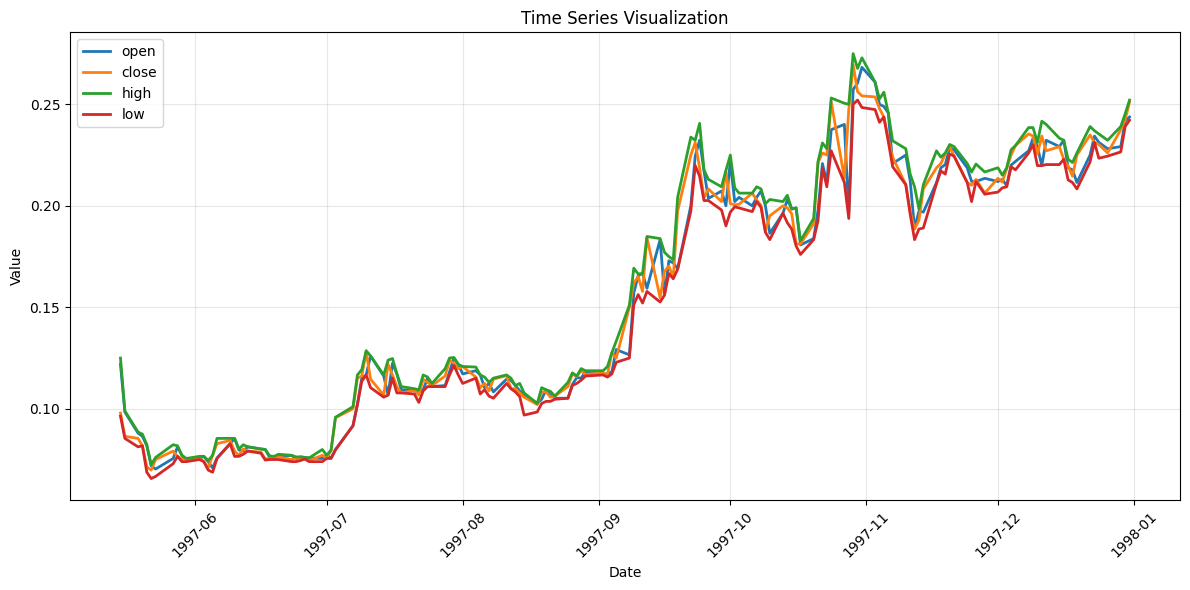

In [15]:
# Basic line plot
plt.figure(figsize=(12, 6))
plt.plot(y_1997['date'], y_1997[['open', 'close', 'high', 'low']], linewidth=2) #plot all at once
#plt.plot(df_2016['datetime'], df_2016[['open', 'close']], linewidth=2) #plot two at once
#plt.plot(df_2016['datetime'], df_2016[['high','low']], linewidth=2)  #plot two at once
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend(y_1997[['open','close','high','low']]) #use for all of them 
#plt.legend(df_2016[['open','close']]) #use only for open and close 
#plt.legend(df_2016[['high','low']]) #use only for high and low 
plt.show()

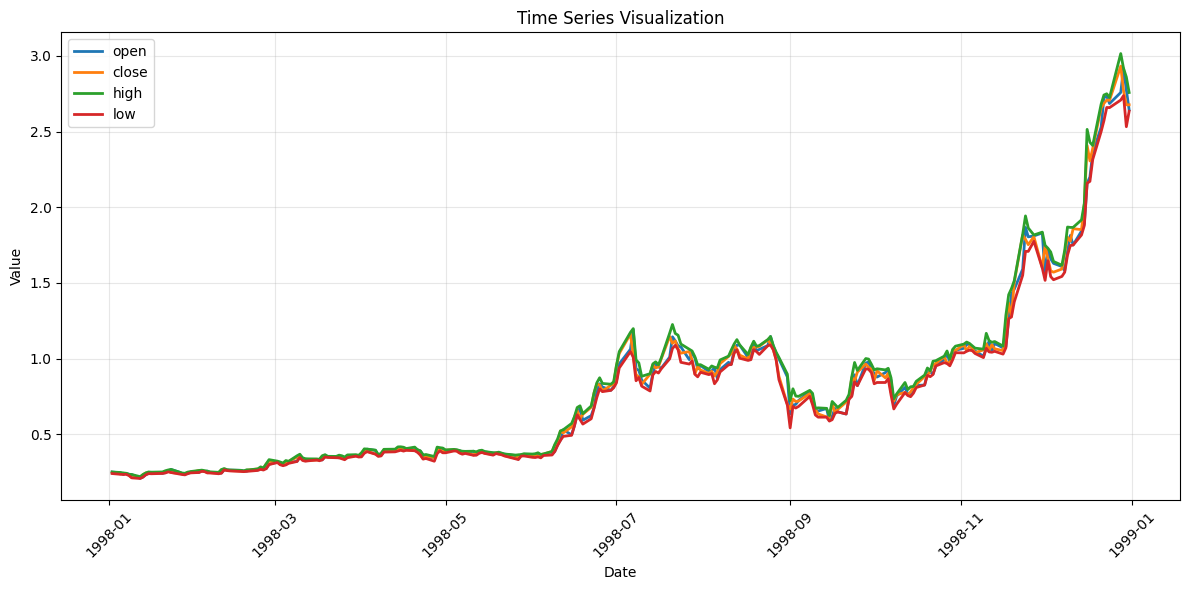

In [16]:
# Basic line plot
plt.figure(figsize=(12, 6))
plt.plot(y_1998['date'], y_1998[['open', 'close', 'high', 'low']], linewidth=2) #plot all at once
#plt.plot(df_2016['datetime'], df_2016[['open', 'close']], linewidth=2) #plot two at once
#plt.plot(df_2016['datetime'], df_2016[['high','low']], linewidth=2)  #plot two at once
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend(y_1998[['open','close','high','low']]) #use for all of them 
#plt.legend(df_2016[['open','close']]) #use only for open and close 
#plt.legend(df_2016[['high','low']]) #use only for high and low 
plt.show()

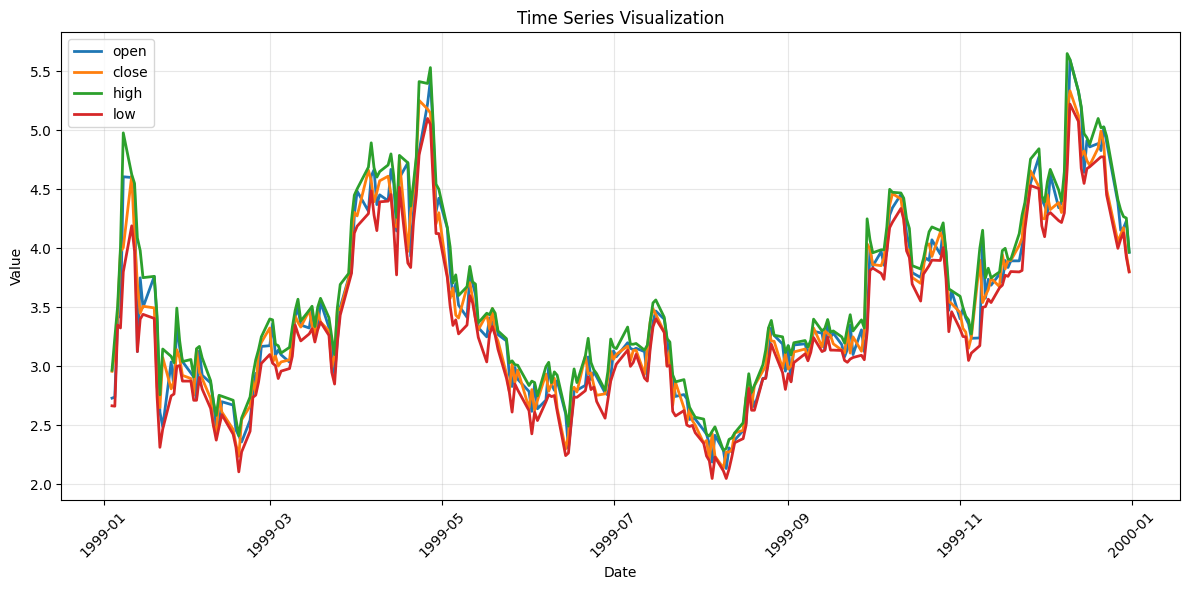

In [17]:
# Basic line plot
plt.figure(figsize=(12, 6))
plt.plot(y_1999['date'], y_1999[['open', 'close', 'high', 'low']], linewidth=2) #plot all at once
#plt.plot(df_2016['datetime'], df_2016[['open', 'close']], linewidth=2) #plot two at once
#plt.plot(df_2016['datetime'], df_2016[['high','low']], linewidth=2)  #plot two at once
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend(y_1999[['open','close','high','low']]) #use for all of them 
#plt.legend(df_2016[['open','close']]) #use only for open and close 
#plt.legend(df_2016[['high','low']]) #use only for high and low 
plt.show()

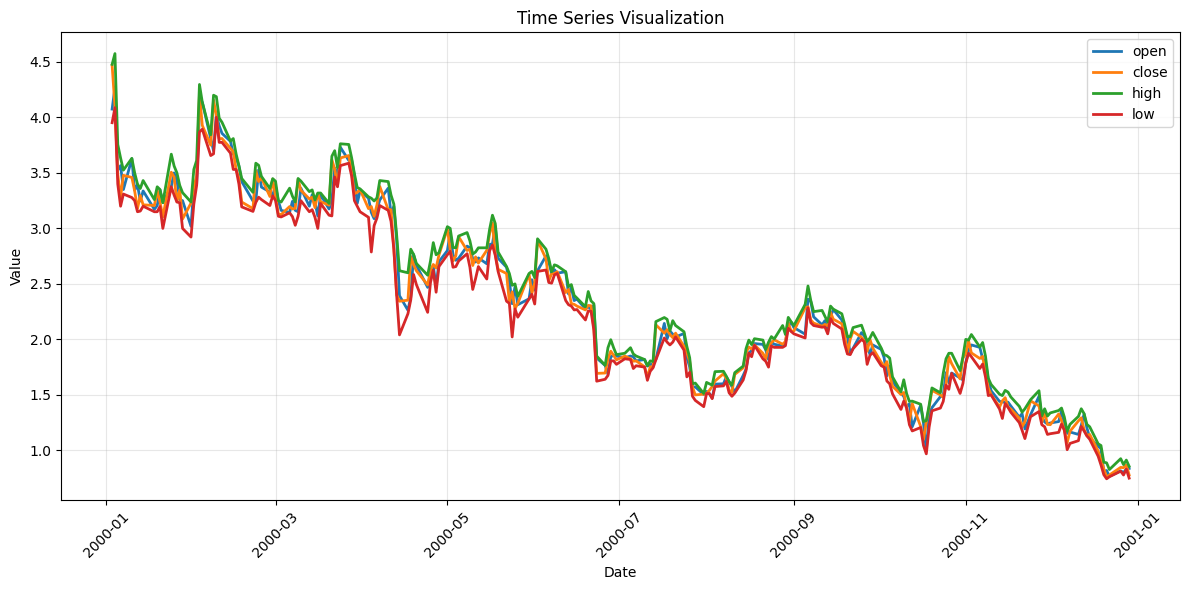

In [18]:
# Basic line plot
plt.figure(figsize=(12, 6))
plt.plot(y_2000['date'], y_2000[['open', 'close', 'high', 'low']], linewidth=2) #plot all at once
#plt.plot(df_2016['datetime'], df_2016[['open', 'close']], linewidth=2) #plot two at once
#plt.plot(df_2016['datetime'], df_2016[['high','low']], linewidth=2)  #plot two at once
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend(y_2000[['open','close','high','low']]) #use for all of them 
#plt.legend(df_2016[['open','close']]) #use only for open and close 
#plt.legend(df_2016[['high','low']]) #use only for high and low 
plt.show()

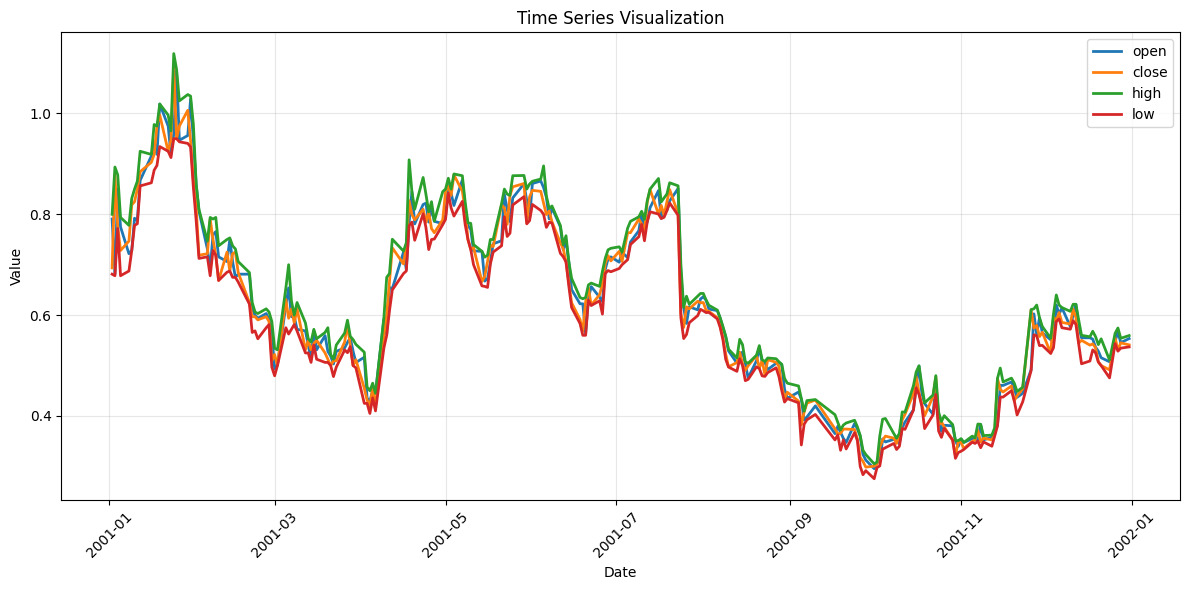

In [19]:
# Basic line plot
plt.figure(figsize=(12, 6))
plt.plot(y_2001['date'], y_2001[['open', 'close', 'high', 'low']], linewidth=2) #plot all at once
#plt.plot(df_2016['datetime'], df_2016[['open', 'close']], linewidth=2) #plot two at once
#plt.plot(df_2016['datetime'], df_2016[['high','low']], linewidth=2)  #plot two at once
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend(y_2001[['open','close','high','low']]) #use for all of them 
#plt.legend(df_2016[['open','close']]) #use only for open and close 
#plt.legend(df_2016[['high','low']]) #use only for high and low 
plt.show()

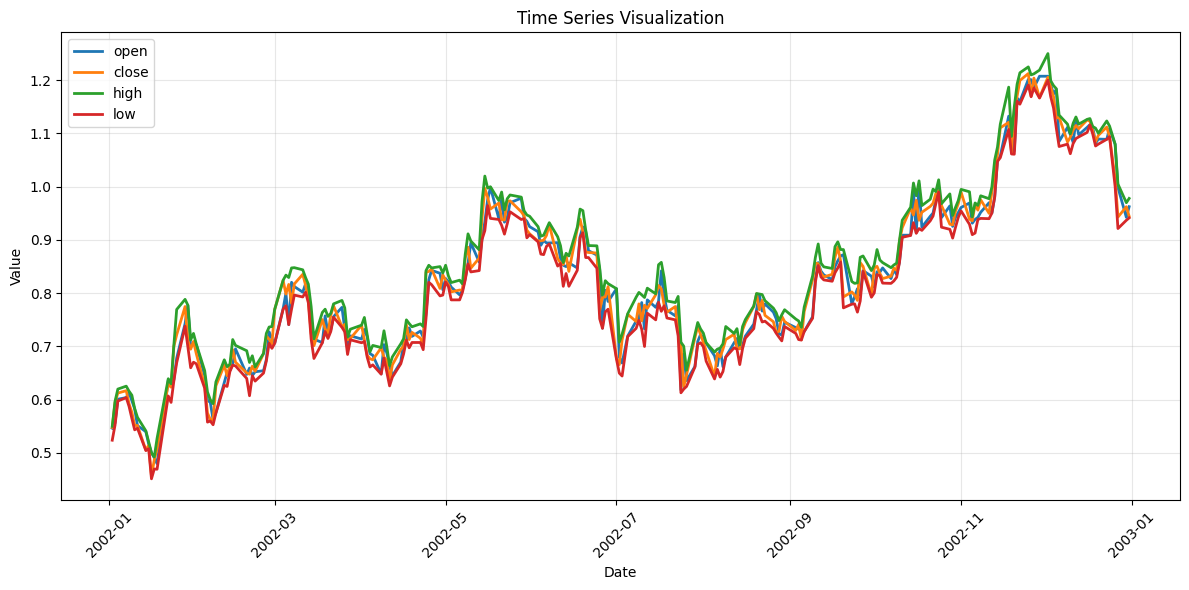

In [20]:
# Basic line plot
plt.figure(figsize=(12, 6))
plt.plot(y_2002['date'], y_2002[['open', 'close', 'high', 'low']], linewidth=2) #plot all at once
#plt.plot(df_2016['datetime'], df_2016[['open', 'close']], linewidth=2) #plot two at once
#plt.plot(df_2016['datetime'], df_2016[['high','low']], linewidth=2)  #plot two at once
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend(y_2002[['open','close','high','low']]) #use for all of them 
#plt.legend(df_2016[['open','close']]) #use only for open and close 
#plt.legend(df_2016[['high','low']]) #use only for high and low 
plt.show()

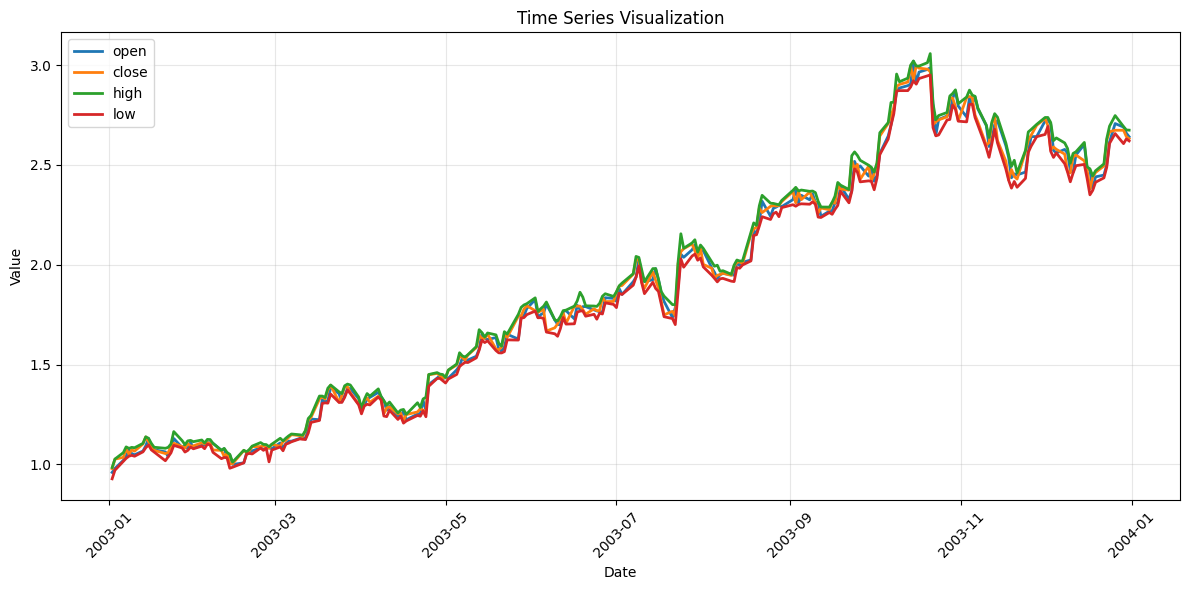

In [21]:
# Basic line plot
plt.figure(figsize=(12, 6))
plt.plot(y_2003['date'], y_2003[['open', 'close', 'high', 'low']], linewidth=2) #plot all at once
#plt.plot(df_2016['datetime'], df_2016[['open', 'close']], linewidth=2) #plot two at once
#plt.plot(df_2016['datetime'], df_2016[['high','low']], linewidth=2)  #plot two at once
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend(y_2003[['open','close','high','low']]) #use for all of them 
#plt.legend(df_2016[['open','close']]) #use only for open and close 
#plt.legend(df_2016[['high','low']]) #use only for high and low 
plt.show()

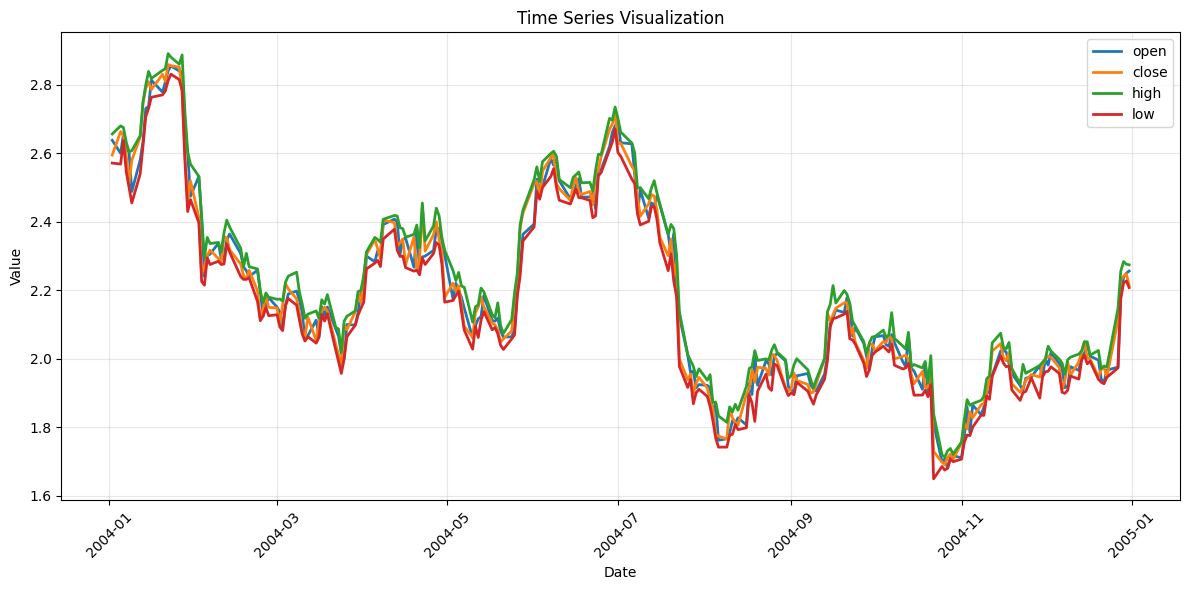

In [22]:
# Basic line plot
plt.figure(figsize=(12, 6))
plt.plot(y_2004['date'], y_2004[['open', 'close', 'high', 'low']], linewidth=2) #plot all at once
#plt.plot(df_2016['datetime'], df_2016[['open', 'close']], linewidth=2) #plot two at once
#plt.plot(df_2016['datetime'], df_2016[['high','low']], linewidth=2)  #plot two at once
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend(y_2004[['open','close','high','low']]) #use for all of them 
#plt.legend(df_2016[['open','close']]) #use only for open and close 
#plt.legend(df_2016[['high','low']]) #use only for high and low 
plt.show()

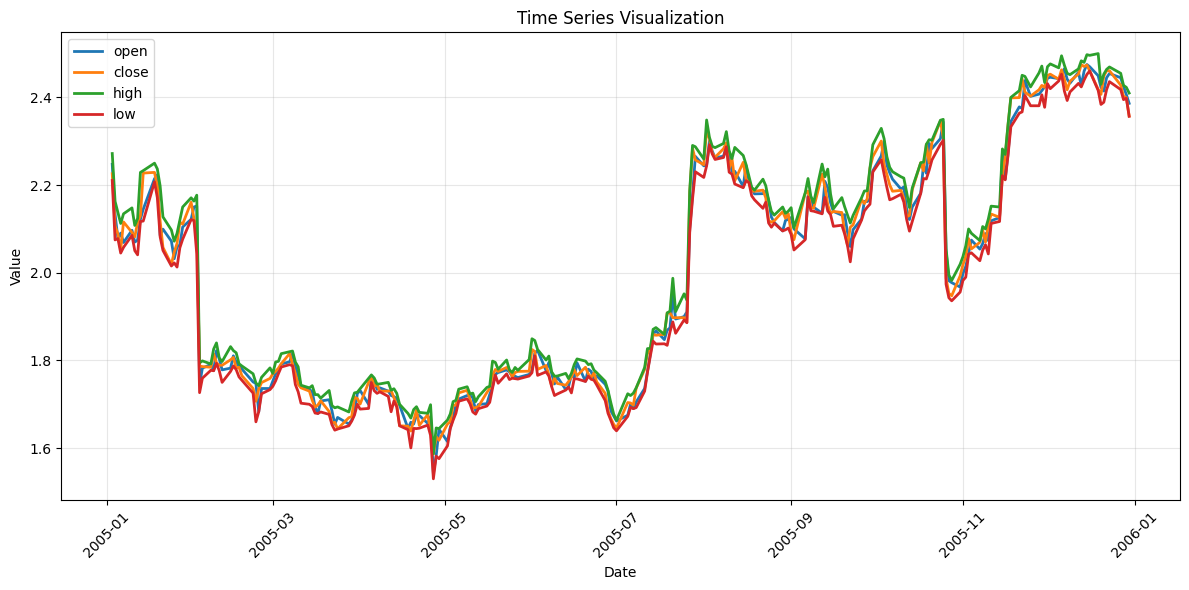

In [23]:
# Basic line plot
plt.figure(figsize=(12, 6))
plt.plot(y_2005['date'], y_2005[['open', 'close', 'high', 'low']], linewidth=2) #plot all at once
#plt.plot(df_2016['datetime'], df_2016[['open', 'close']], linewidth=2) #plot two at once
#plt.plot(df_2016['datetime'], df_2016[['high','low']], linewidth=2)  #plot two at once
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend(y_2005[['open','close','high','low']]) #use for all of them 
#plt.legend(df_2016[['open','close']]) #use only for open and close 
#plt.legend(df_2016[['high','low']]) #use only for high and low 
plt.show()

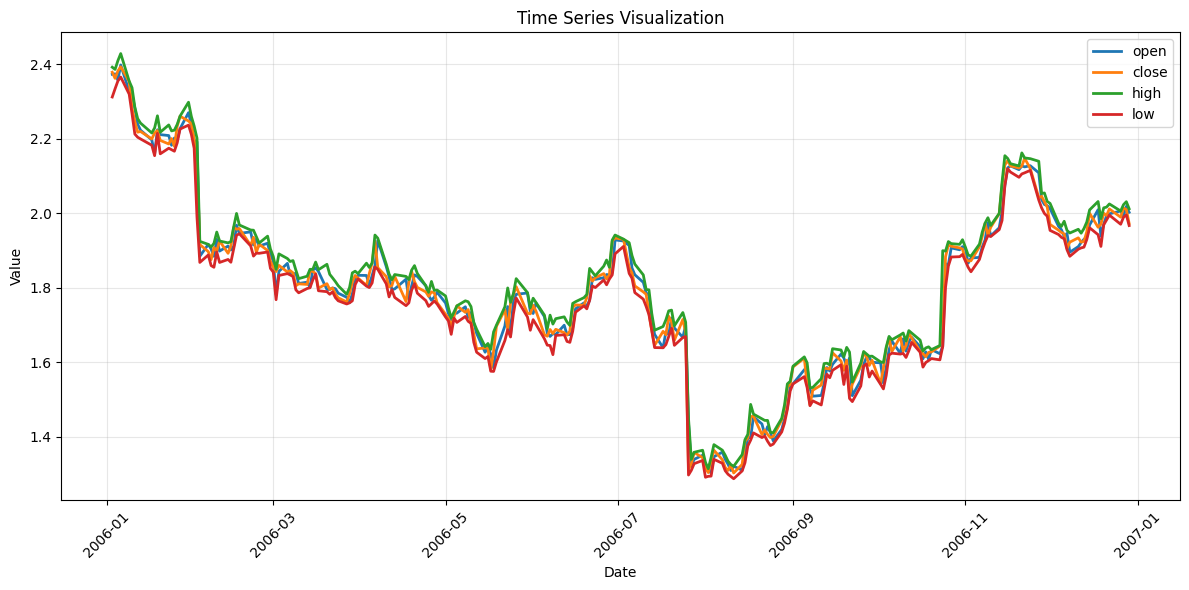

In [24]:
# Basic line plot
plt.figure(figsize=(12, 6))
plt.plot(y_2006['date'], y_2006[['open', 'close', 'high', 'low']], linewidth=2) #plot all at once
#plt.plot(df_2016['datetime'], df_2016[['open', 'close']], linewidth=2) #plot two at once
#plt.plot(df_2016['datetime'], df_2016[['high','low']], linewidth=2)  #plot two at once
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend(y_2006[['open','close','high','low']]) #use for all of them 
#plt.legend(df_2016[['open','close']]) #use only for open and close 
#plt.legend(df_2016[['high','low']]) #use only for high and low 
plt.show()

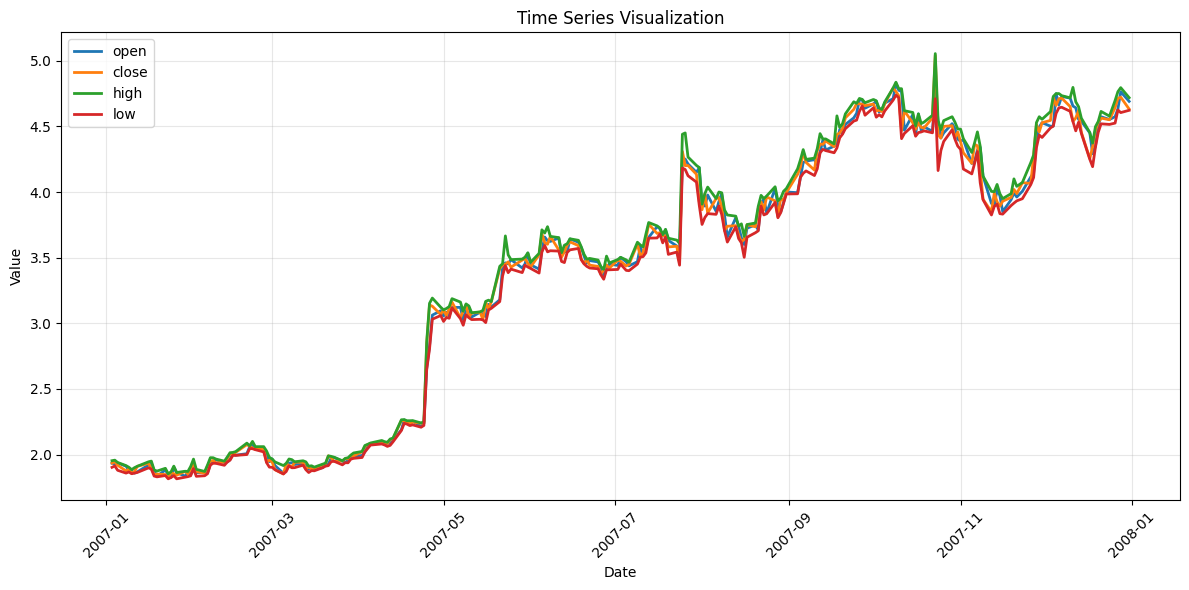

In [25]:
# Basic line plot
plt.figure(figsize=(12, 6))
plt.plot(y_2007['date'], y_2007[['open', 'close', 'high', 'low']], linewidth=2) #plot all at once
#plt.plot(df_2016['datetime'], df_2016[['open', 'close']], linewidth=2) #plot two at once
#plt.plot(df_2016['datetime'], df_2016[['high','low']], linewidth=2)  #plot two at once
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend(y_2007[['open','close','high','low']]) #use for all of them 
#plt.legend(df_2016[['open','close']]) #use only for open and close 
#plt.legend(df_2016[['high','low']]) #use only for high and low 
plt.show()

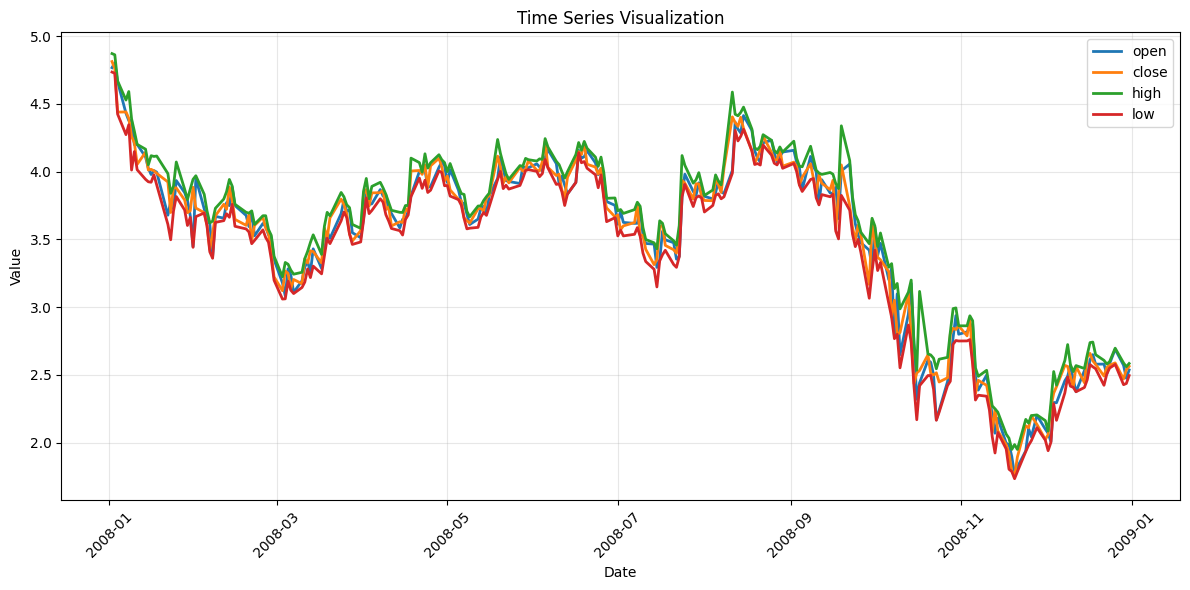

In [26]:
# Basic line plot
plt.figure(figsize=(12, 6))
plt.plot(y_2008['date'], y_2008[['open', 'close', 'high', 'low']], linewidth=2) #plot all at once
#plt.plot(df_2016['datetime'], df_2016[['open', 'close']], linewidth=2) #plot two at once
#plt.plot(df_2016['datetime'], df_2016[['high','low']], linewidth=2)  #plot two at once
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend(y_2008[['open','close','high','low']]) #use for all of them 
#plt.legend(df_2016[['open','close']]) #use only for open and close 
#plt.legend(df_2016[['high','low']]) #use only for high and low 
plt.show()

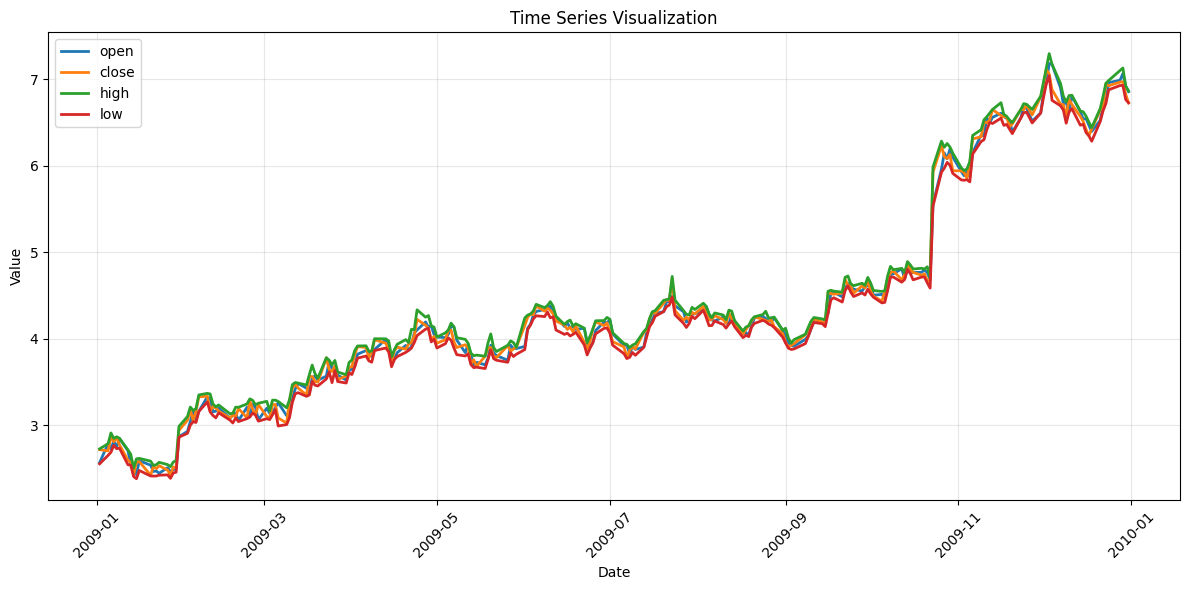

In [27]:
# Basic line plot
plt.figure(figsize=(12, 6))
plt.plot(y_2009['date'], y_2009[['open', 'close', 'high', 'low']], linewidth=2) #plot all at once
#plt.plot(df_2016['datetime'], df_2016[['open', 'close']], linewidth=2) #plot two at once
#plt.plot(df_2016['datetime'], df_2016[['high','low']], linewidth=2)  #plot two at once
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend(y_2009[['open','close','high','low']]) #use for all of them 
#plt.legend(df_2016[['open','close']]) #use only for open and close 
#plt.legend(df_2016[['high','low']]) #use only for high and low 
plt.show()

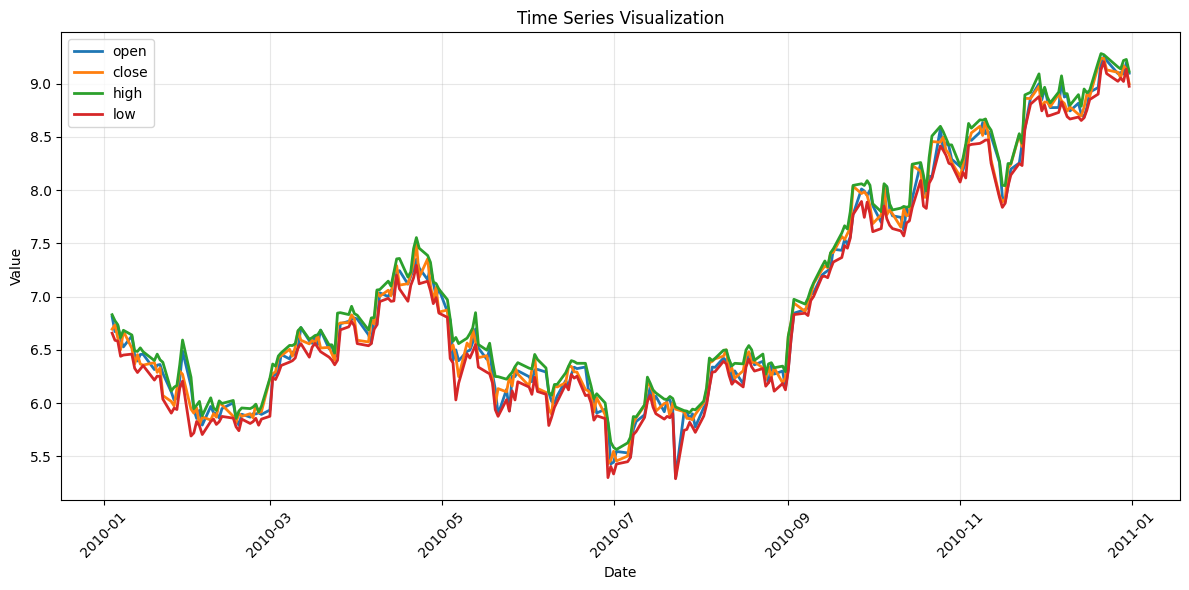

In [28]:
# Basic line plot
plt.figure(figsize=(12, 6))
plt.plot(y_2010['date'], y_2010[['open', 'close', 'high', 'low']], linewidth=2) #plot all at once
#plt.plot(df_2016['datetime'], df_2016[['open', 'close']], linewidth=2) #plot two at once
#plt.plot(df_2016['datetime'], df_2016[['high','low']], linewidth=2)  #plot two at once
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend(y_2010[['open','close','high','low']]) #use for all of them 
#plt.legend(df_2016[['open','close']]) #use only for open and close 
#plt.legend(df_2016[['high','low']]) #use only for high and low 
plt.show()

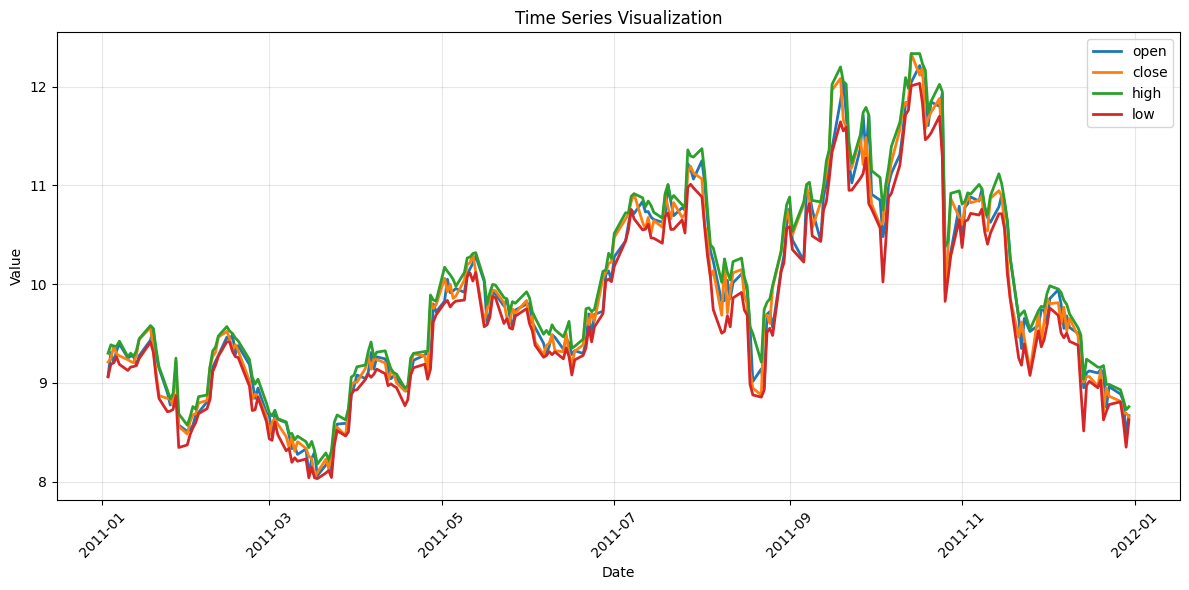

In [29]:
# Basic line plot
plt.figure(figsize=(12, 6))
plt.plot(y_2011['date'], y_2011[['open', 'close', 'high', 'low']], linewidth=2) #plot all at once
#plt.plot(df_2016['datetime'], df_2016[['open', 'close']], linewidth=2) #plot two at once
#plt.plot(df_2016['datetime'], df_2016[['high','low']], linewidth=2)  #plot two at once
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend(y_2011[['open','close','high','low']]) #use for all of them 
#plt.legend(df_2016[['open','close']]) #use only for open and close 
#plt.legend(df_2016[['high','low']]) #use only for high and low 
plt.show()

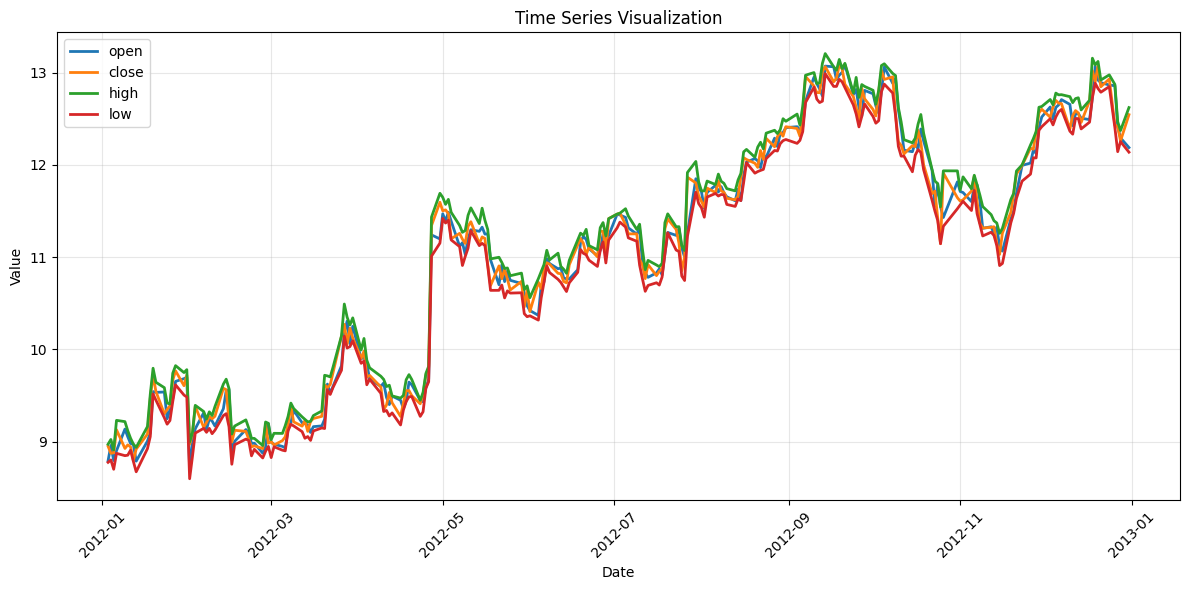

In [30]:
# Basic line plot
plt.figure(figsize=(12, 6))
plt.plot(y_2012['date'], y_2012[['open', 'close', 'high', 'low']], linewidth=2) #plot all at once
#plt.plot(df_2016['datetime'], df_2016[['open', 'close']], linewidth=2) #plot two at once
#plt.plot(df_2016['datetime'], df_2016[['high','low']], linewidth=2)  #plot two at once
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend(y_2012[['open','close','high','low']]) #use for all of them 
#plt.legend(df_2016[['open','close']]) #use only for open and close 
#plt.legend(df_2016[['high','low']]) #use only for high and low 
plt.show()

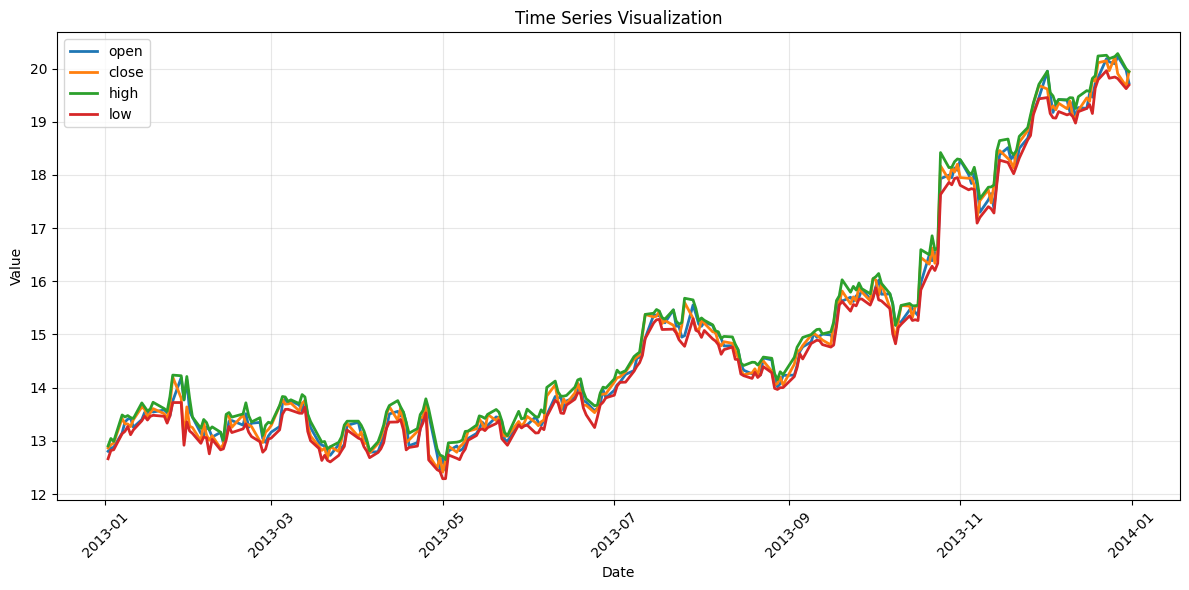

In [31]:
# Basic line plot
plt.figure(figsize=(12, 6))
plt.plot(y_2013['date'], y_2013[['open', 'close', 'high', 'low']], linewidth=2) #plot all at once
#plt.plot(df_2016['datetime'], df_2016[['open', 'close']], linewidth=2) #plot two at once
#plt.plot(df_2016['datetime'], df_2016[['high','low']], linewidth=2)  #plot two at once
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend(y_2013[['open','close','high','low']]) #use for all of them 
#plt.legend(df_2016[['open','close']]) #use only for open and close 
#plt.legend(df_2016[['high','low']]) #use only for high and low 
plt.show()

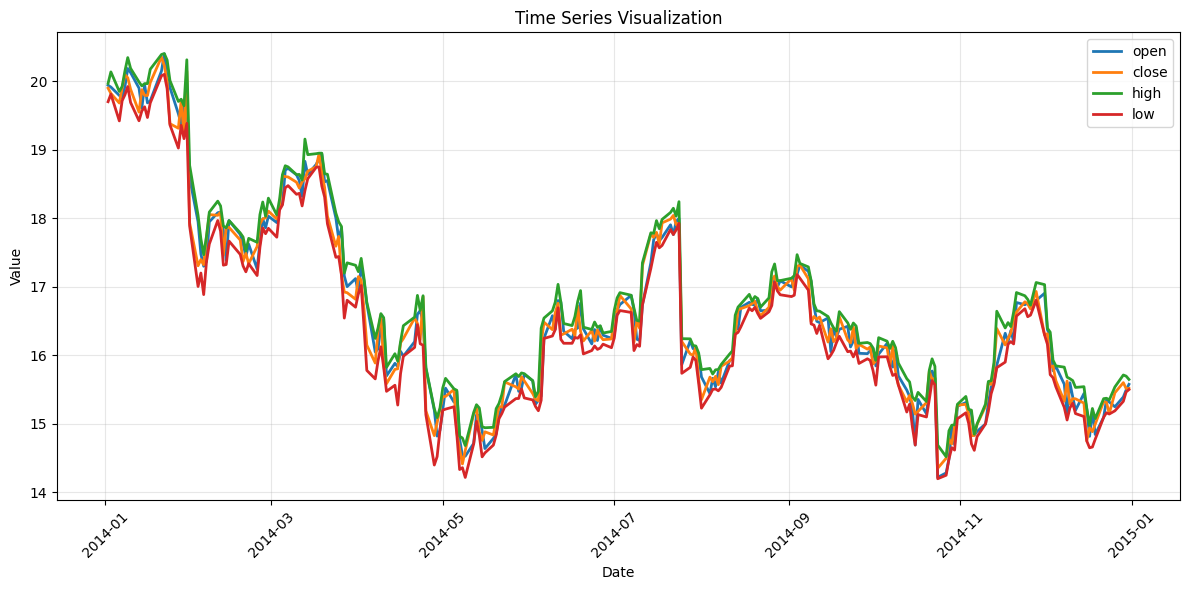

In [32]:
# Basic line plot
plt.figure(figsize=(12, 6))
plt.plot(y_2014['date'], y_2014[['open', 'close', 'high', 'low']], linewidth=2) #plot all at once
#plt.plot(df_2016['datetime'], df_2016[['open', 'close']], linewidth=2) #plot two at once
#plt.plot(df_2016['datetime'], df_2016[['high','low']], linewidth=2)  #plot two at once
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend(y_2014[['open','close','high','low']]) #use for all of them 
#plt.legend(df_2016[['open','close']]) #use only for open and close 
#plt.legend(df_2016[['high','low']]) #use only for high and low 
plt.show()

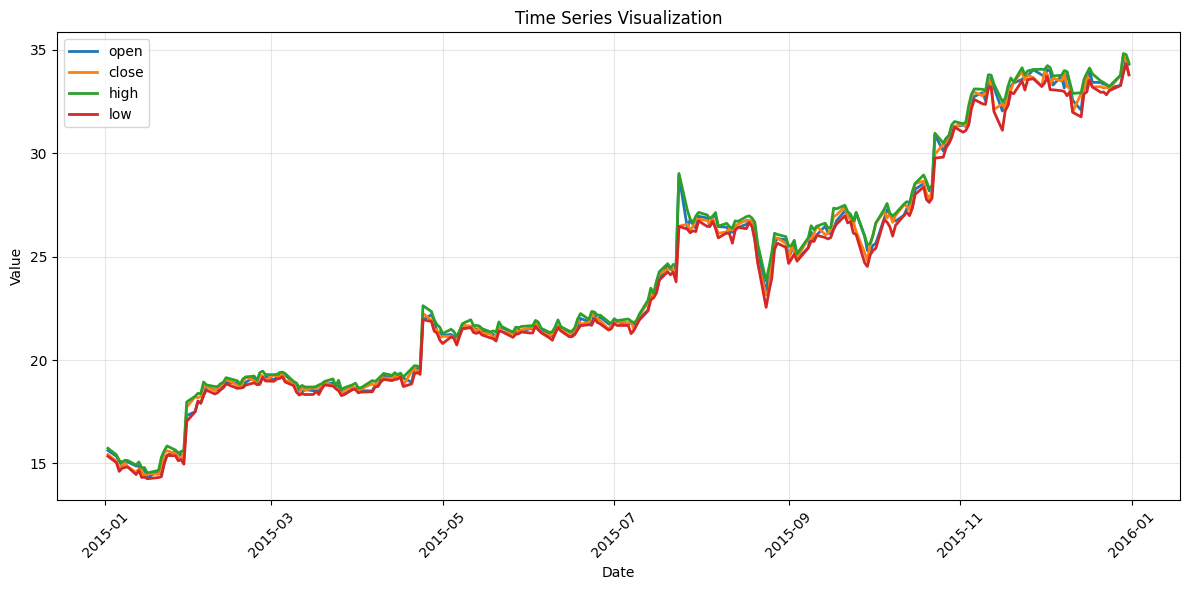

In [33]:
# Basic line plot
plt.figure(figsize=(12, 6))
plt.plot(y_2015['date'], y_2015[['open', 'close', 'high', 'low']], linewidth=2) #plot all at once
#plt.plot(df_2016['datetime'], df_2016[['open', 'close']], linewidth=2) #plot two at once
#plt.plot(df_2016['datetime'], df_2016[['high','low']], linewidth=2)  #plot two at once
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend(y_2015[['open','close','high','low']]) #use for all of them 
#plt.legend(df_2016[['open','close']]) #use only for open and close 
#plt.legend(df_2016[['high','low']]) #use only for high and low 
plt.show()

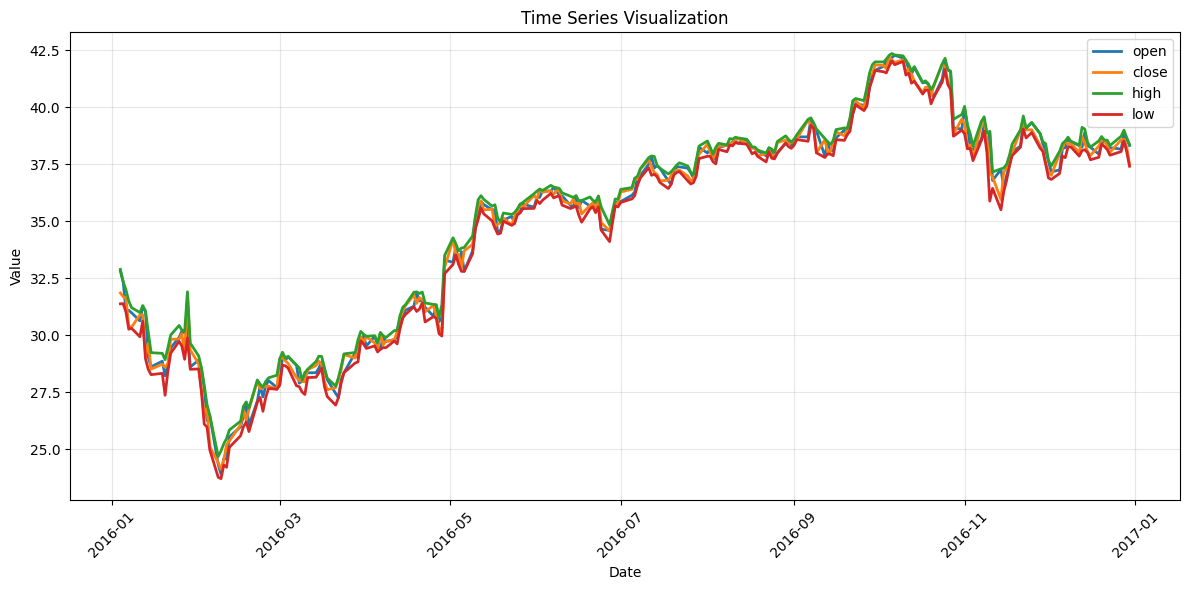

In [34]:
# Basic line plot
plt.figure(figsize=(12, 6))
plt.plot(y_2016['date'], y_2016[['open', 'close', 'high', 'low']], linewidth=2) #plot all at once
#plt.plot(df_2016['datetime'], df_2016[['open', 'close']], linewidth=2) #plot two at once
#plt.plot(df_2016['datetime'], df_2016[['high','low']], linewidth=2)  #plot two at once
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend(y_2016[['open','close','high','low']]) #use for all of them 
#plt.legend(df_2016[['open','close']]) #use only for open and close 
#plt.legend(df_2016[['high','low']]) #use only for high and low 
plt.show()

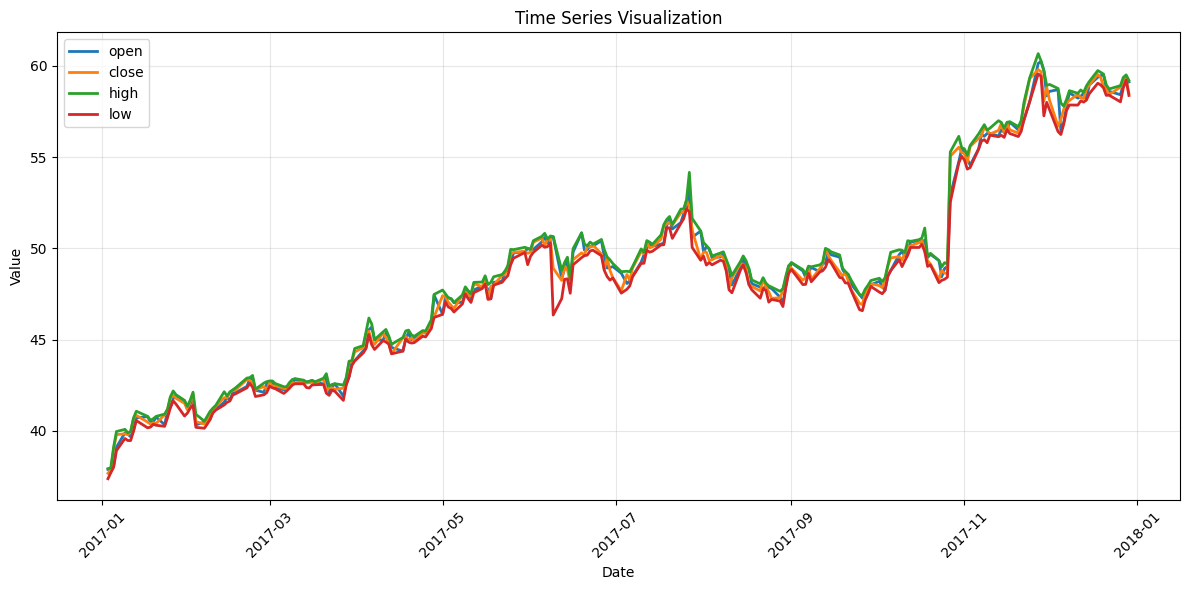

In [35]:
# Basic line plot
plt.figure(figsize=(12, 6))
plt.plot(y_2017['date'], y_2017[['open', 'close', 'high', 'low']], linewidth=2) #plot all at once
#plt.plot(df_2016['datetime'], df_2016[['open', 'close']], linewidth=2) #plot two at once
#plt.plot(df_2016['datetime'], df_2016[['high','low']], linewidth=2)  #plot two at once
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend(y_2017[['open','close','high','low']]) #use for all of them 
#plt.legend(df_2016[['open','close']]) #use only for open and close 
#plt.legend(df_2016[['high','low']]) #use only for high and low 
plt.show()

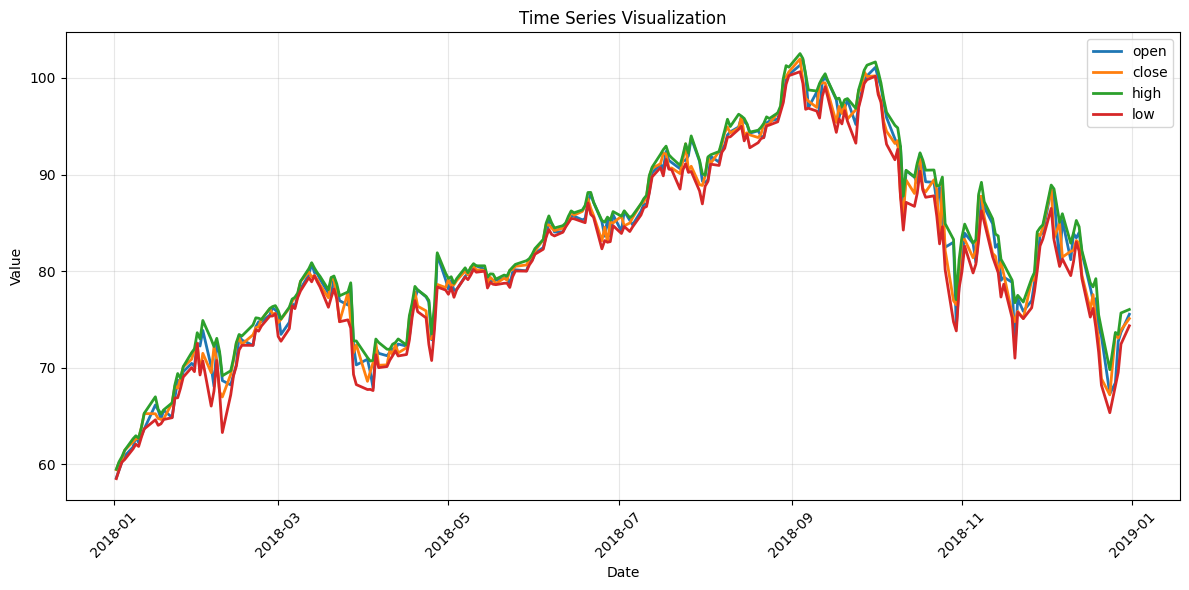

In [36]:
# Basic line plot
plt.figure(figsize=(12, 6))
plt.plot(y_2018['date'], y_2018[['open', 'close', 'high', 'low']], linewidth=2) #plot all at once
#plt.plot(df_2016['datetime'], df_2016[['open', 'close']], linewidth=2) #plot two at once
#plt.plot(df_2016['datetime'], df_2016[['high','low']], linewidth=2)  #plot two at once
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend(y_2018[['open','close','high','low']]) #use for all of them 
#plt.legend(df_2016[['open','close']]) #use only for open and close 
#plt.legend(df_2016[['high','low']]) #use only for high and low 
plt.show()

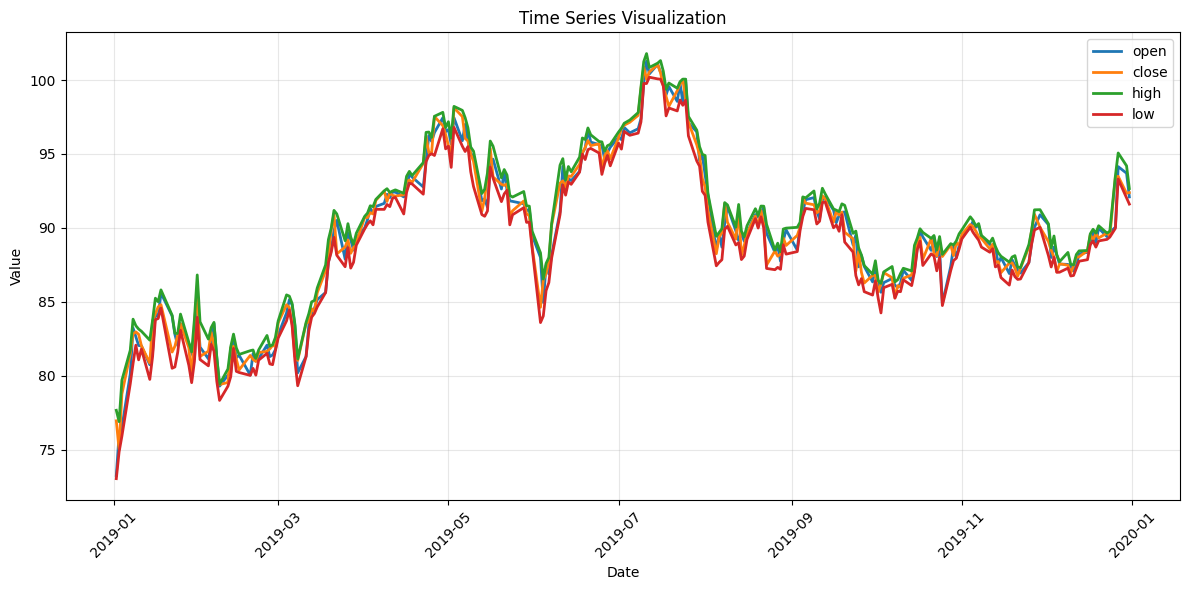

In [37]:
# Basic line plot
plt.figure(figsize=(12, 6))
plt.plot(y_2019['date'], y_2019[['open', 'close', 'high', 'low']], linewidth=2) #plot all at once
#plt.plot(df_2016['datetime'], df_2016[['open', 'close']], linewidth=2) #plot two at once
#plt.plot(df_2016['datetime'], df_2016[['high','low']], linewidth=2)  #plot two at once
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend(y_2019[['open','close','high','low']]) #use for all of them 
#plt.legend(df_2016[['open','close']]) #use only for open and close 
#plt.legend(df_2016[['high','low']]) #use only for high and low 
plt.show()

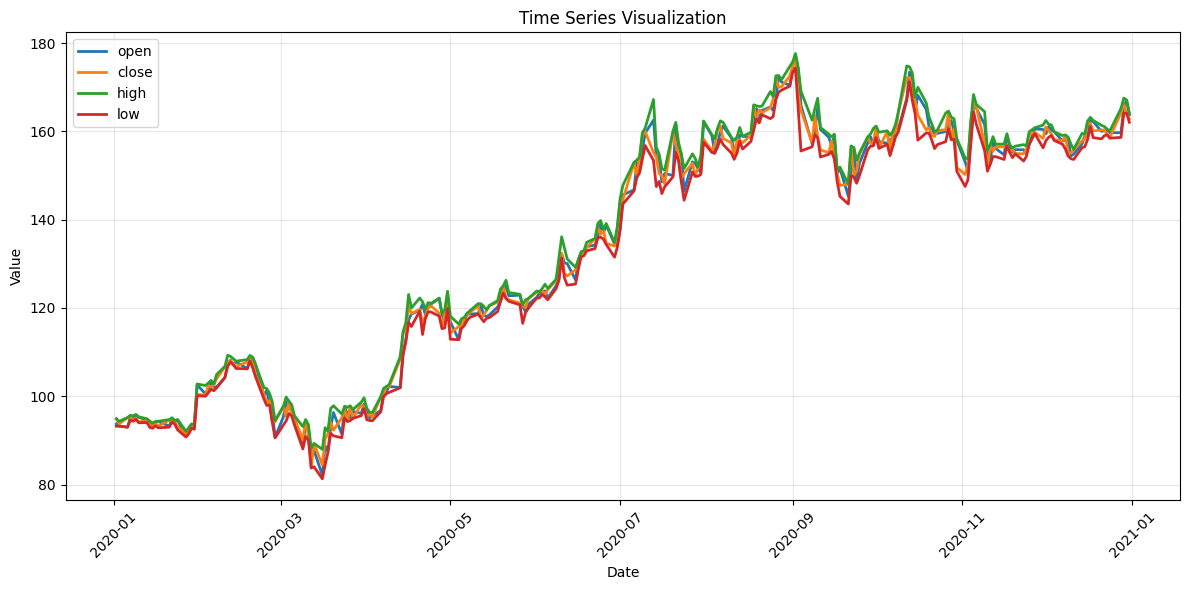

In [38]:
# Basic line plot
plt.figure(figsize=(12, 6))
plt.plot(y_2020['date'], y_2020[['open', 'close', 'high', 'low']], linewidth=2) #plot all at once
#plt.plot(df_2016['datetime'], df_2016[['open', 'close']], linewidth=2) #plot two at once
#plt.plot(df_2016['datetime'], df_2016[['high','low']], linewidth=2)  #plot two at once
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend(y_2020[['open','close','high','low']]) #use for all of them 
#plt.legend(df_2016[['open','close']]) #use only for open and close 
#plt.legend(df_2016[['high','low']]) #use only for high and low 
plt.show()

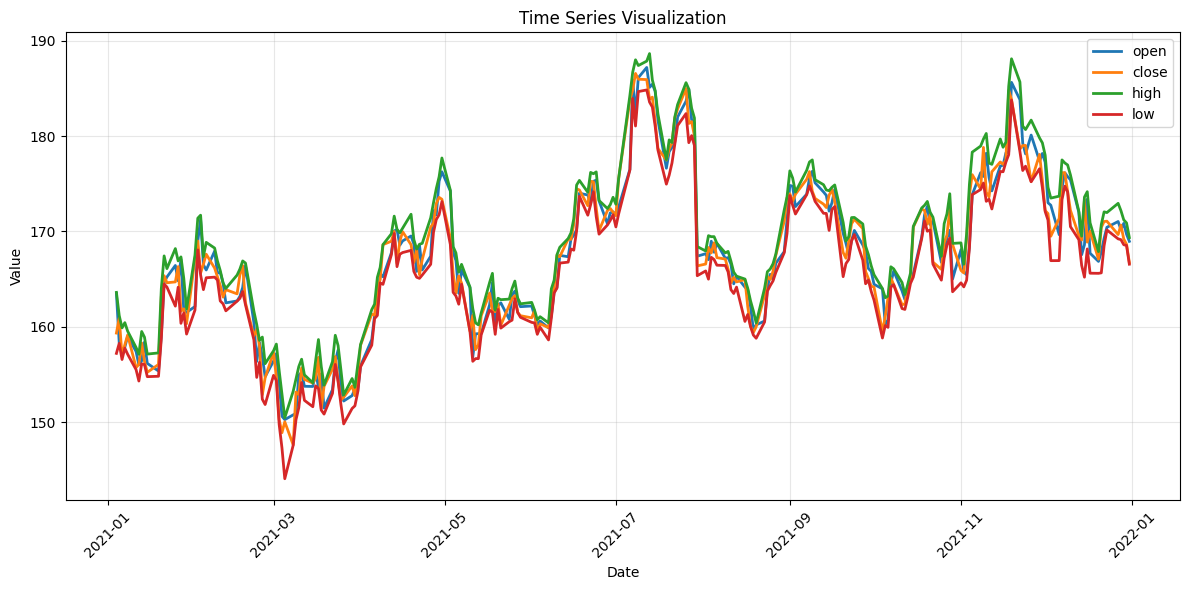

In [39]:
# Basic line plot
plt.figure(figsize=(12, 6))
plt.plot(y_2021['date'], y_2021[['open', 'close', 'high', 'low']], linewidth=2) #plot all at once
#plt.plot(df_2016['datetime'], df_2016[['open', 'close']], linewidth=2) #plot two at once
#plt.plot(df_2016['datetime'], df_2016[['high','low']], linewidth=2)  #plot two at once
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend(y_2021[['open','close','high','low']]) #use for all of them 
#plt.legend(df_2016[['open','close']]) #use only for open and close 
#plt.legend(df_2016[['high','low']]) #use only for high and low 
plt.show()

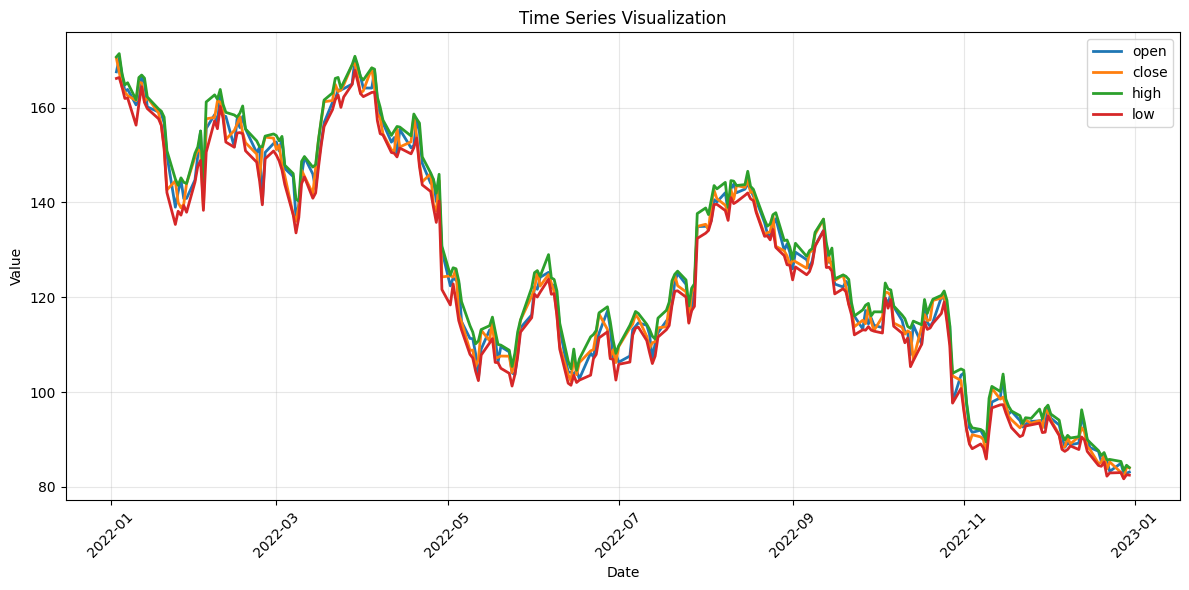

In [40]:
# Basic line plot
plt.figure(figsize=(12, 6))
plt.plot(y_2022['date'], y_2022[['open', 'close', 'high', 'low']], linewidth=2) #plot all at once
#plt.plot(df_2016['datetime'], df_2016[['open', 'close']], linewidth=2) #plot two at once
#plt.plot(df_2016['datetime'], df_2016[['high','low']], linewidth=2)  #plot two at once
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend(y_2022[['open','close','high','low']]) #use for all of them 
#plt.legend(df_2016[['open','close']]) #use only for open and close 
#plt.legend(df_2016[['high','low']]) #use only for high and low 
plt.show()

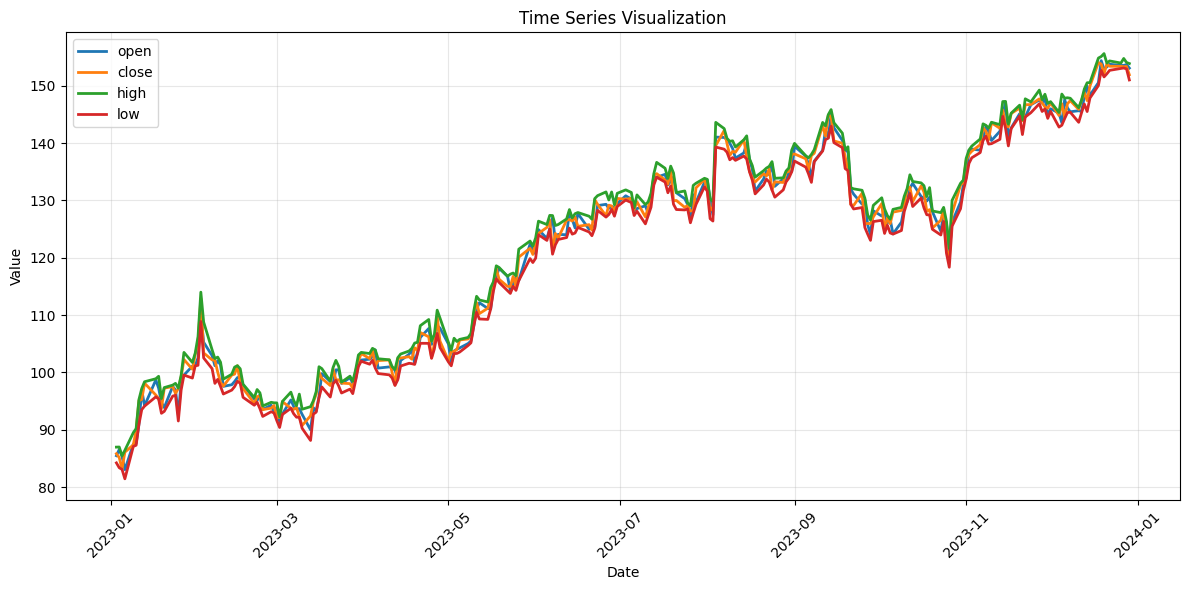

In [41]:
# Basic line plot
plt.figure(figsize=(12, 6))
plt.plot(y_2023['date'], y_2023[['open', 'close', 'high', 'low']], linewidth=2) #plot all at once
#plt.plot(df_2016['datetime'], df_2016[['open', 'close']], linewidth=2) #plot two at once
#plt.plot(df_2016['datetime'], df_2016[['high','low']], linewidth=2)  #plot two at once
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend(y_2023[['open','close','high','low']]) #use for all of them 
#plt.legend(df_2016[['open','close']]) #use only for open and close 
#plt.legend(df_2016[['high','low']]) #use only for high and low 
plt.show()

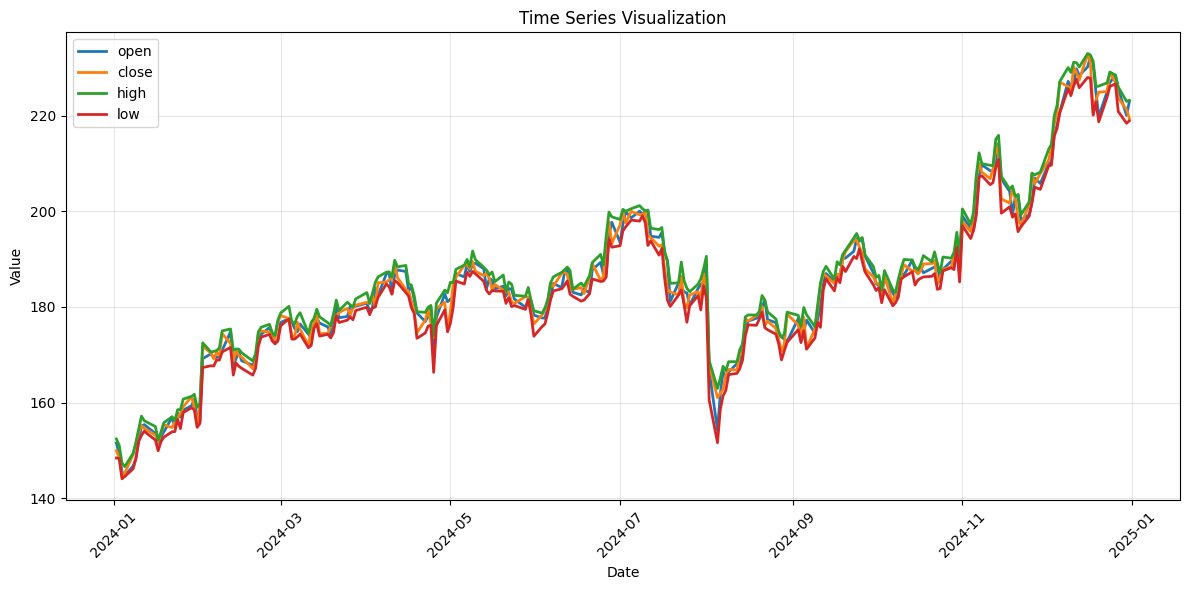

In [42]:
# Basic line plot
plt.figure(figsize=(12, 6))
plt.plot(y_2024['date'], y_2024[['open', 'close', 'high', 'low']], linewidth=2) #plot all at once
#plt.plot(df_2016['datetime'], df_2016[['open', 'close']], linewidth=2) #plot two at once
#plt.plot(df_2016['datetime'], df_2016[['high','low']], linewidth=2)  #plot two at once
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend(y_2024[['open','close','high','low']]) #use for all of them 
#plt.legend(df_2016[['open','close']]) #use only for open and close 
#plt.legend(df_2016[['high','low']]) #use only for high and low 
plt.show()

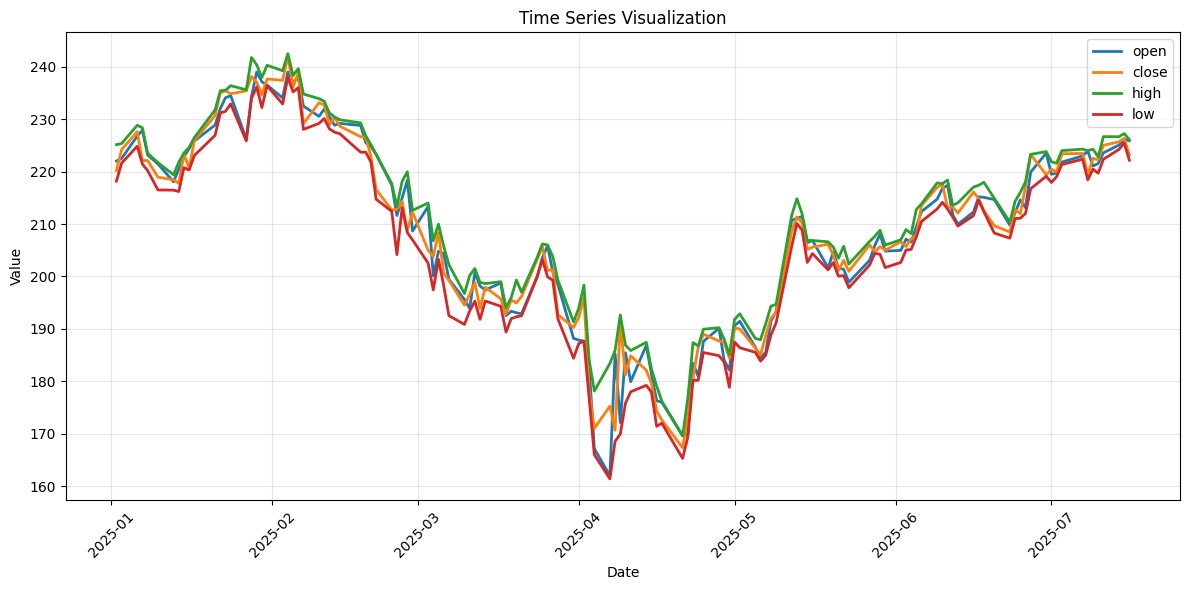

In [43]:
# Basic line plot
plt.figure(figsize=(12, 6))
plt.plot(y_2025['date'], y_2025[['open', 'close', 'high', 'low']], linewidth=2) #plot all at once
#plt.plot(df_2016['datetime'], df_2016[['open', 'close']], linewidth=2) #plot two at once
#plt.plot(df_2016['datetime'], df_2016[['high','low']], linewidth=2)  #plot two at once
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend(y_2025[['open','close','high','low']]) #use for all of them 
#plt.legend(df_2016[['open','close']]) #use only for open and close 
#plt.legend(df_2016[['high','low']]) #use only for high and low 
plt.show()

In [44]:
df.head()

date     close      high       low      open      volume
0 1997-05-15  0.097917  0.125000  0.096354  0.121875  1443120000
1 1997-05-16  0.086458  0.098958  0.085417  0.098438   294000000
2 1997-05-19  0.085417  0.088542  0.081250  0.088021   122136000
3 1997-05-20  0.081771  0.087500  0.081771  0.086458   109344000
4 1997-05-21  0.071354  0.082292  0.068750  0.081771   377064000

#### Looking at the visualizations the best year to buy stocks was 2010

## Time Series Demonstration

In [47]:
# Generate sample datasets for demonstration
np.random.seed(42)

# 1. Stock price data (with trend and volatility)
dates = pd.date_range('2020-01-01', periods=1000, freq='D')
trend = np.linspace(100, 150, 1000)
seasonal = 10 * np.sin(2 * np.pi * np.arange(1000) / 365)
noise = np.random.normal(0, 5, 1000)
stock_prices = trend + seasonal + noise
stock_df = pd.DataFrame({'date': dates, 'price': stock_prices})

# 2. Sales data (with strong seasonality)
sales_trend = np.linspace(1000, 2000, 1000)
sales_seasonal = 500 * np.sin(2 * np.pi * np.arange(1000) / 52) + 200 * np.sin(2 * np.pi * np.arange(1000) / 7)
sales_noise = np.random.normal(0, 100, 1000)
sales_data = sales_trend + sales_seasonal + sales_noise
sales_df = pd.DataFrame({'date': dates, 'sales': sales_data})

In [48]:
sales_df.head()

date        sales
0 2020-01-01  1139.935544
1 2020-01-02  1310.099006
2 2020-01-03  1322.608454
3 2020-01-04  1202.388517
4 2020-01-05  1219.411174

In [49]:
# 1. ARIMA MODEL
print("1. ARIMA MODEL - Predicting Stock Prices")

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Prepare data
train_size = int(len(stock_prices) * 0.8)
train_data = stock_prices[:train_size]
test_data = stock_prices[train_size:]

# Fit ARIMA model
arima_model = ARIMA(train_data, order=(5,1,0))  # (p,d,q)
arima_fitted = arima_model.fit()

# Make predictions
arima_forecast = arima_fitted.forecast(steps=len(test_data))
arima_mse = np.mean((test_data - arima_forecast) ** 2)

print(f"ARIMA Model Summary:")
print(f"Order: (5,1,0)")
print(f"MSE on test set: {arima_mse:.2f}")
print(f"Sample predictions: {arima_forecast[:5]}")
print("-" * 127)


1. ARIMA MODEL - Predicting Stock Prices
ARIMA Model Summary:
Order: (5,1,0)
MSE on test set: 56.44
Sample predictions: [149.83234589 150.34273074 150.15588927 150.26414392 149.88185488]
-------------------------------------------------------------------------------------------------------------------------------


In [50]:
# 2. SARIMA MODEL
print("2. SARIMA MODEL - Predicting Sales with Seasonality")

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Prepare data
train_sales = sales_data[:train_size]
test_sales = sales_data[train_size:]

# Fit SARIMA model
sarima_model = SARIMAX(train_sales, 
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 52))  # Weekly seasonality
sarima_fitted = sarima_model.fit()

# Make predictions
sarima_forecast = sarima_fitted.forecast(steps=len(test_sales))
sarima_mse = np.mean((test_sales - sarima_forecast) ** 2)

print(f"SARIMA Model Summary:")
print(f"Order: (1,1,1) x (1,1,1,52)")
print(f"MSE on test set: {sarima_mse:.2f}")
print(f"Sample predictions: {sarima_forecast[:5]}")
print("-" * 127)

2. SARIMA MODEL - Predicting Sales with Seasonality
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.47558D+00    |proj g|=  1.17925D-01


 This problem is unconstrained.



At iterate    5    f=  6.41453D+00    |proj g|=  1.17371D-02

At iterate   10    f=  6.34624D+00    |proj g|=  8.43432D-02

At iterate   15    f=  6.33235D+00    |proj g|=  2.26181D-03

At iterate   20    f=  6.32813D+00    |proj g|=  1.90562D-02

At iterate   25    f=  6.19901D+00    |proj g|=  7.43921D-02

At iterate   30    f=  6.09400D+00    |proj g|=  9.69784D-02

At iterate   35    f=  6.04261D+00    |proj g|=  8.09335D-04

At iterate   40    f=  6.04258D+00    |proj g|=  2.46007D-03

At iterate   45    f=  6.04239D+00    |proj g|=  2.94446D-03


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.04237D+00    |proj g|=  1.01545D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     77      1     0     0   1.015D-06   6.042D+00
  F =   6.0423657560237372     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
SARIMA Model Summary:
Order: (1,1,1) x (1,1,1,52)
MSE on test set: 25168.85
Sample predictions: [2203.98330199 2116.3721134  2084.80367554 1887.862978   1916.46449094]
-------------------------------------------------------------------------------------------------------------------------------


In [51]:
# 3. EXPONENTIAL SMOOTHING
print("3. EXPONENTIAL SMOOTHING - Triple Exponential (Holt-Winters)")
print("-" * 50)

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt-Winters model
hw_model = ExponentialSmoothing(train_sales, 
                                trend='add', 
                                seasonal='add', 
                                seasonal_periods=52)
hw_fitted = hw_model.fit()

# Make predictions
hw_forecast = hw_fitted.forecast(steps=len(test_sales))
hw_mse = np.mean((test_sales - hw_forecast) ** 2)

print(f"Holt-Winters Model Summary:")
print(f"Trend: additive, Seasonal: additive")
print(f"Seasonal periods: 52")
print(f"MSE on test set: {hw_mse:.2f}")
print(f"Sample predictions: {hw_forecast[:5]}")
print("-" * 127)

3. EXPONENTIAL SMOOTHING - Triple Exponential (Holt-Winters)
--------------------------------------------------
Holt-Winters Model Summary:
Trend: additive, Seasonal: additive
Seasonal periods: 52
MSE on test set: 31996.62
Sample predictions: [2127.54778662 2075.29511411 1987.14093008 1909.05513426 1883.02965725]
-------------------------------------------------------------------------------------------------------------------------------


In [52]:
print("4. RANDOM FOREST - Stock Price Prediction with Features")

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

def create_features(data, window=5):
    """Create lag features and technical indicators"""
    df = pd.DataFrame({'price': data})
    
    # Lag features
    for i in range(1, window+1):
        df[f'lag_{i}'] = df['price'].shift(i)
    
    # Moving averages
    df['ma_5'] = df['price'].rolling(5).mean()
    df['ma_10'] = df['price'].rolling(10).mean()
    
    # Technical indicators
    df['rsi'] = calculate_rsi(df['price'])
    df['volatility'] = df['price'].rolling(10).std()
    
    return df.dropna()

def calculate_rsi(prices, window=14):
    """Calculate Relative Strength Index"""
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Create features
feature_df = create_features(stock_prices)
X = feature_df.drop('price', axis=1).values
y = feature_df['price'].values

# Split data
train_size_rf = int(len(X) * 0.8)
X_train, X_test = X[:train_size_rf], X[train_size_rf:]
y_train, y_test = y[:train_size_rf], y[train_size_rf:]

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test_scaled)
rf_mse = np.mean((y_test - rf_predictions) ** 2)

print(f"Random Forest Model Summary:")
print(f"Features: lag_1-5, MA_5, MA_10, RSI, volatility")
print(f"N_estimators: 100")
print(f"MSE on test set: {rf_mse:.2f}")
print(f"Feature importance (top 3): {dict(zip(['lag_1', 'lag_2', 'ma_5'], rf_model.feature_importances_[:3]))}")
print("-" * 127)

4. RANDOM FOREST - Stock Price Prediction with Features
Random Forest Model Summary:
Features: lag_1-5, MA_5, MA_10, RSI, volatility
N_estimators: 100
MSE on test set: 21.60
Feature importance (top 3): {'lag_1': 0.007090241614070044, 'lag_2': 0.005731536862759267, 'ma_5': 0.006659115064306575}
-------------------------------------------------------------------------------------------------------------------------------


In [53]:
# 5. XGBOOST
print("5. XGBOOST - Advanced Gradient Boosting")

try:
    import xgboost as xgb
    
    # Fit XGBoost model
    xgb_model = xgb.XGBRegressor(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=42
    )
    xgb_model.fit(X_train_scaled, y_train)
    
    # Make predictions
    xgb_predictions = xgb_model.predict(X_test_scaled)
    xgb_mse = np.mean((y_test - xgb_predictions) ** 2)
    
    print(f"XGBoost Model Summary:")
    print(f"N_estimators: 100, max_depth: 6, learning_rate: 0.1")
    print(f"MSE on test set: {xgb_mse:.2f}")
    print(f"Sample predictions: {xgb_predictions[:5]}")
    print()
    
except ImportError:
    print("XGBoost not installed. Install with: pip install xgboost")
    print()

5. XGBOOST - Advanced Gradient Boosting
XGBoost Model Summary:
N_estimators: 100, max_depth: 6, learning_rate: 0.1
MSE on test set: 26.08
Sample predictions: [152.0259  150.32076 148.48224 147.09856 150.88145]



In [54]:
# 6. SUPPORT VECTOR REGRESSION (SVR)
print("6. SUPPORT VECTOR REGRESSION (SVR)")

from sklearn.svm import SVR

# Fit SVR model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

# Make predictions
svr_predictions = svr_model.predict(X_test_scaled)
svr_mse = np.mean((y_test - svr_predictions) ** 2)

print(f"SVR Model Summary:")
print(f"Kernel: RBF, C: 100, gamma: 0.1")
print(f"MSE on test set: {svr_mse:.2f}")
print(f"Sample predictions: {svr_predictions[:5]}")
print("-" * 127)

6. SUPPORT VECTOR REGRESSION (SVR)
SVR Model Summary:
Kernel: RBF, C: 100, gamma: 0.1
MSE on test set: 9.87
Sample predictions: [150.1912755  149.73897837 145.28828223 143.97110769 147.41884611]
-------------------------------------------------------------------------------------------------------------------------------


In [58]:
# 7. LSTM NEURAL NETWORK WITH TENSORFLOW
print("7. LSTM NEURAL NETWORK - Deep Learning Approach")

try:
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense, Dropout
    from sklearn.preprocessing import MinMaxScaler
    
    def create_lstm_sequences(data, seq_length=60):
        """Create sequences for LSTM"""
        X, y = [], []
        for i in range(seq_length, len(data)):
            X.append(data[i-seq_length:i])
            y.append(data[i])
        return np.array(X), np.array(y)
    
    # Scale data for LSTM
    lstm_scaler = MinMaxScaler()
    scaled_prices = lstm_scaler.fit_transform(stock_prices.reshape(-1, 1)).flatten()
    
    # Create sequences
    X_lstm, y_lstm = create_lstm_sequences(scaled_prices, seq_length=60)
    
    # Split data
    train_size_lstm = int(len(X_lstm) * 0.8)
    X_train_lstm = X_lstm[:train_size_lstm].reshape((train_size_lstm, 60, 1))
    X_test_lstm = X_lstm[train_size_lstm:].reshape((len(X_lstm) - train_size_lstm, 60, 1))
    y_train_lstm = y_lstm[:train_size_lstm]
    y_test_lstm = y_lstm[train_size_lstm:]
    
    # Build LSTM model
    lstm_model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(60, 1)),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(1)
    ])
    
    lstm_model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train model (reduced epochs for demo)
    history = lstm_model.fit(X_train_lstm, y_train_lstm, 
                            batch_size=32, epochs=5, 
                            validation_split=0.1, verbose=0)
    
    # Make predictions
    lstm_predictions_scaled = lstm_model.predict(X_test_lstm)
    lstm_predictions = lstm_scaler.inverse_transform(lstm_predictions_scaled).flatten()
    y_test_actual = lstm_scaler.inverse_transform(y_test_lstm.reshape(-1, 1)).flatten()
    lstm_mse = np.mean((y_test_actual - lstm_predictions) ** 2)
    
    print(f"LSTM Model Summary:")
    print(f"Architecture: LSTM(50) -> Dropout -> LSTM(50) -> Dense(25) -> Dense(1)")
    print(f"Sequence length: 60")
    print(f"MSE on test set: {lstm_mse:.2f}")
    print(f"Sample predictions: {lstm_predictions[:5]}")
    print()
    
except ImportError:
    print("TensorFlow not installed. Install with: pip install tensorflow")
    print("-" * 127)


7. LSTM NEURAL NETWORK - Deep Learning Approach
TensorFlow not installed. Install with: pip install tensorflow
-------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# 7. LSTM NEURAL NETWORK - Fixed PyTorch Implementation
print("7. LSTM NEURAL NETWORK - Deep Learning Approach")
try:
    import torch
    import torch.nn as nn
    import torch.optim as optim
    from sklearn.preprocessing import MinMaxScaler
    import numpy as np
    
    # Set device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    def create_lstm_sequences(data, seq_length=60):
        """Create sequences for LSTM"""
        X, y = [], []
        for i in range(seq_length, len(data)):
            X.append(data[i-seq_length:i])
            y.append(data[i])
        return np.array(X), np.array(y)
    
    # Define LSTM model class
    class LSTMModel(nn.Module):
        def __init__(self, input_size=1, hidden_size=50, num_layers=2, dropout=0.2):
            super(LSTMModel, self).__init__()
            self.hidden_size = hidden_size
            self.num_layers = num_layers
            
            # LSTM layers
            self.lstm1 = nn.LSTM(input_size, hidden_size, batch_first=True, dropout=dropout)
            self.lstm2 = nn.LSTM(hidden_size, hidden_size, batch_first=True)
            
            # Dropout layers
            self.dropout = nn.Dropout(dropout)
            
            # Dense layers
            self.fc1 = nn.Linear(hidden_size, 25)
            self.fc2 = nn.Linear(25, 1)
            
        def forward(self, x):
            # LSTM layer 1
            lstm_out, _ = self.lstm1(x)
            lstm_out = self.dropout(lstm_out)
            
            # LSTM layer 2 (only last output)
            lstm_out, _ = self.lstm2(lstm_out)
            
            # Take only the last time step
            lstm_out = lstm_out[:, -1, :]
            lstm_out = self.dropout(lstm_out)
            
            # Dense layers
            out = torch.relu(self.fc1(lstm_out))
            out = self.fc2(out)
            
            return out
    
    # Generate sample stock data for demonstration
    np.random.seed(42)
    dates = pd.date_range('2020-01-01', periods=1000, freq='D')
    trend = np.linspace(100, 150, 1000)
    noise = np.random.normal(0, 5, 1000)
    seasonal = 10 * np.sin(2 * np.pi * np.arange(1000) / 365)
    stock_prices = trend + seasonal + noise
    
    # Scale data for LSTM
    lstm_scaler = MinMaxScaler()
    scaled_prices = lstm_scaler.fit_transform(stock_prices.reshape(-1, 1)).flatten()
    
    # Create sequences
    X_lstm, y_lstm = create_lstm_sequences(scaled_prices, seq_length=60)
    
    # Split data
    train_size_lstm = int(len(X_lstm) * 0.8)
    X_train_lstm = X_lstm[:train_size_lstm]
    X_test_lstm = X_lstm[train_size_lstm:]
    y_train_lstm = y_lstm[:train_size_lstm]
    y_test_lstm = y_lstm[train_size_lstm:]
    
    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train_lstm).unsqueeze(-1).to(device)
    X_test_tensor = torch.FloatTensor(X_test_lstm).unsqueeze(-1).to(device)
    y_train_tensor = torch.FloatTensor(y_train_lstm).to(device)
    y_test_tensor = torch.FloatTensor(y_test_lstm).to(device)
    
    # Initialize model
    lstm_model = LSTMModel().to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(lstm_model.parameters(), lr=0.001)
    
    # Training loop
    print("Training LSTM model...")
    lstm_model.train()
    num_epochs = 50
    batch_size = 32
    
    for epoch in range(num_epochs):
        total_loss = 0
        for i in range(0, len(X_train_tensor), batch_size):
            batch_X = X_train_tensor[i:i+batch_size]
            batch_y = y_train_tensor[i:i+batch_size]
            
            optimizer.zero_grad()
            outputs = lstm_model(batch_X).squeeze()
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        
        if epoch % 10 == 0:
            print(f'Epoch [{epoch}/{num_epochs}], Loss: {total_loss/len(X_train_tensor)*batch_size:.6f}')
    
    # Make predictions
    lstm_model.eval()
    with torch.no_grad():
        lstm_predictions_scaled = lstm_model(X_test_tensor).cpu().numpy().squeeze()
        lstm_predictions = lstm_scaler.inverse_transform(lstm_predictions_scaled.reshape(-1, 1)).flatten()
        y_test_actual = lstm_scaler.inverse_transform(y_test_lstm.reshape(-1, 1)).flatten()
        lstm_mse = np.mean((y_test_actual - lstm_predictions) ** 2)
    
    print(f"\nLSTM Model Summary:")
    print(f"Architecture: LSTM(50) -> Dropout(0.2) -> LSTM(50) -> Dense(25) -> Dense(1)")
    print(f"Sequence length: 60")
    print(f"Training epochs: {num_epochs}")
    print(f"MSE on test set: {lstm_mse:.2f}")
    print(f"RMSE on test set: {np.sqrt(lstm_mse):.2f}")
    print(f"Sample predictions: {lstm_predictions[:5]}")
    print(f"Sample actual values: {y_test_actual[:5]}")
    print()
    
    # Optional: Plot predictions vs actual
    try:
        import matplotlib.pyplot as plt
        
        plt.figure(figsize=(12, 6))
        plt.plot(y_test_actual[:100], label='Actual', alpha=0.8)
        plt.plot(lstm_predictions[:100], label='LSTM Predictions', alpha=0.8)
        plt.title('LSTM Stock Price Predictions vs Actual')
        plt.xlabel('Time Steps')
        plt.ylabel('Stock Price')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
        
    except ImportError:
        print("Matplotlib not available for plotting")
    
except ImportError as e:
    print(f"Required libraries not installed: {e}")
    print("Please install required packages with:")
    print("pip install torch numpy pandas scikit-learn")
    print("For GPU support: pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118")
except Exception as e:
    print(f"Error occurred: {e}")

print("-" * 127)

7. LSTM NEURAL NETWORK - Deep Learning Approach


In [ ]:
# 9. FACEBOOK PROPHET
print("8. FACEBOOK PROPHET - Automated Forecasting")

try:
    from prophet import Prophet
    
    # Prepare data for Prophet
    prophet_df = pd.DataFrame({
        'ds': dates[:train_size],
        'y': sales_data[:train_size]
    })
    
    # Fit Prophet model
    prophet_model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False,
        changepoint_prior_scale=0.05
    )
    prophet_model.fit(prophet_df)
    
    # Make future dataframe
    future = prophet_model.make_future_dataframe(periods=len(test_sales), freq='D')
    
    # Make predictions
    prophet_forecast = prophet_model.predict(future)
    prophet_predictions = prophet_forecast['yhat'].iloc[train_size:].values
    prophet_mse = np.mean((test_sales - prophet_predictions) ** 2)
    
    print(f"Prophet Model Summary:")
    print(f"Seasonalities: yearly, weekly enabled")
    print(f"Changepoint prior scale: 0.05")
    print(f"MSE on test set: {prophet_mse:.2f}")
    print(f"Sample predictions: {prophet_predictions[:5]}")
    print()
    
except ImportError:
    print("Prophet not installed. Install with: pip install prophet")
    print("-" * 127)

#### Couldn't complete task 8 and task 9 because it's computationally expensive